__Условия и информация для решения__

Необходимо доказать, что ваша модель решает проблему заказчика

Заказчик не знает специфических терминов (roc-auc, precision, recall и пр. ). Необходимо доказать, что ваша модель решает проблему заказчика.

Необходимо предложить алгоритм/условия использования модели. На каком уровне скора необходимо прекратить выдачи кредитного продукта, почему выбран такой cut off?


__Road map задач от заказчика__

1. Построить модель, предсказывающую дефолт по займу:
- Обработать данные
- Проанализировать данные
- Разработать модель
- Обучить/протестировать модель
- Оценить качество модели (не ухудшается ли качество модели по временем? стабильны ли переменные?)
- Посчитать эффект от внедрения модели
2. Презентовать модель бизнес-заказчику.


# ПОСТРОЕНИЕ МОДЕЛИ

## Обработка данных

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_table('Data.txt',sep=';')

In [ ]:
df.head()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,Нет дефолта
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,Нет дефолта
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,Нет дефолта
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,Нет дефолта
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,Нет дефолта


In [ ]:
print(df.shape)

(1723, 14)


## Анализ данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Месяц выдачи кредита        1723 non-null   int64 
 1   Сумма кредита               1723 non-null   int64 
 2   Срок кредита                1723 non-null   int64 
 3   Возраст клиента             1723 non-null   int64 
 4   Пол клиента                 1723 non-null   object
 5   Образование клиента         1723 non-null   object
 6   Тип товара                  1723 non-null   object
 7   Наличие детей у клиента     1723 non-null   object
 8   Регион выдачи кредита       1723 non-null   object
 9   Доход клиента               1723 non-null   int64 
 10  Семейное положение          1723 non-null   object
 11  Оператор связи              1723 non-null   object
 12  Является ли клиентом банка  1723 non-null   object
 13  Флаг дефолта по кредиту     1723 non-null   obje

In [ ]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Месяц выдачи кредита,1723.0,NaN,NaN,NaN,6.708067,3.53842,1.0,3.0,7.0,10.0,12.0
Сумма кредита,1723.0,NaN,NaN,NaN,29264.654672,27926.778301,5000.0,13000.0,21500.0,34000.0,301000.0
Срок кредита,1723.0,NaN,NaN,NaN,11.546721,6.548354,3.0,6.0,12.0,12.0,36.0
Возраст клиента,1723.0,NaN,NaN,NaN,35.911782,13.120203,18.0,26.0,32.0,44.0,90.0
Пол клиента,1723,2,Мужской,931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Образование клиента,1723,6,Среднее специальное,836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип товара,1723,22,Мобильные телефоны,498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Наличие детей у клиента,1723,2,Детей нет,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Регион выдачи кредита,1723,3,Другие регионы,1414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Доход клиента,1723.0,NaN,NaN,NaN,32652.350551,20913.193158,1000.0,21000.0,27000.0,38000.0,401000.0


Пропусков в исходнике нет.

In [ ]:
df['Флаг дефолта по кредиту'].value_counts() # посмотрим насколько сбалансированы категориальные данные по дефолту

Нет дефолта    1527
Дефолт          196
Name: Флаг дефолта по кредиту, dtype: int64

категориальные данные не сбалансированы

In [ ]:
df.nunique() # смотрим количество уникальных значений

Месяц выдачи кредита           12
Сумма кредита                 205
Срок кредита                   22
Возраст клиента                66
Пол клиента                     2
Образование клиента             6
Тип товара                     22
Наличие детей у клиента         2
Регион выдачи кредита           3
Доход клиента                  76
Семейное положение              3
Оператор связи                  5
Является ли клиентом банка      2
Флаг дефолта по кредиту         2
dtype: int64

In [ ]:
print('Уникальные значения по сумме кредита')
df_=df['Сумма кредита'].unique()
df_.sort()
print(df_)
print('---------------------------')
print('Распределение уникальных значений по сумме кредита')
print(df['Сумма кредита'].value_counts())

Уникальные значения по сумме кредита
[  5000   5500   6000   6500   7000   7500   8000   8500   9000   9500
  10000  10500  11000  11500  12000  12500  13000  13500  14000  14500
  15000  15500  16000  16500  17000  17500  18000  18500  19000  19500
  20000  20500  21000  21500  22000  22500  23000  23500  24000  24500
  25000  25500  26000  26500  27000  27500  28000  28500  29000  29500
  30000  30500  31000  31500  32000  32500  33000  33500  34000  34500
  35000  35500  36000  36500  37000  37500  38000  38500  39000  39500
  40000  40500  41000  41500  42000  42500  43000  43500  44000  44500
  45000  45500  46000  46500  47000  47500  48000  48500  49000  49500
  50000  50500  51000  51500  52000  52500  53000  53500  54000  54500
  55000  55500  56000  56500  57000  57500  58000  58500  59000  60000
  60500  61000  61500  62000  63000  63500  65000  65500  66000  66500
  67000  68000  68500  69000  69500  71000  71500  72000  72500  73000
  73500  74000  74500  75000  76000  765

In [ ]:
print('Уникальные значения по срокам кредита')
df_=df['Срок кредита'].unique()
df_.sort()
print(df_)
print('---------------------------')
print('Распределение уникальных значений по срокам кредита')
print(df['Срок кредита'].value_counts())

Уникальные значения по срокам кредита
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 24 27 30 34 36]
---------------------------
Распределение уникальных значений по срокам кредита
12    557
6     349
10    207
18    122
24    121
3      94
4      67
15     53
36     37
8      36
5      18
9      15
11     13
16      9
7       7
30      6
14      4
20      3
34      2
17      1
13      1
27      1
Name: Срок кредита, dtype: int64


In [ ]:
print('Уникальные значения по возрасту клиента')
df_=df['Возраст клиента'].unique()
df_.sort()
print(df_)
print('---------------------------')
print('Распределение уникальных значений по возрасту клиента')
print(df['Возраст клиента'].value_counts())

Уникальные значения по возрасту клиента
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 87 90]
---------------------------
Распределение уникальных значений по возрасту клиента
23    85
24    79
26    72
31    71
25    70
      ..
18     1
80     1
71     1
87     1
81     1
Name: Возраст клиента, Length: 66, dtype: int64


In [ ]:
print('Уникальные значения по образованию клиента')
print(df['Образование клиента'].unique())
print('---------------------------')
print('Распределение уникальных значений по образованию клиента')
print(df['Образование клиента'].value_counts())

Уникальные значения по образованию клиента
['Среднее специальное' 'Высшее' 'Неоконченное высшее' 'Среднее'
 'Неоконченное среднее'
 'Несколько высших или более высокая ступень образования']
---------------------------
Распределение уникальных значений по образованию клиента
Среднее специальное                                       836
Высшее                                                    585
Среднее                                                   208
Неоконченное высшее                                        86
Неоконченное среднее                                        5
Несколько высших или более высокая ступень образования      3
Name: Образование клиента, dtype: int64


In [ ]:
print('Уникальные значения по типу товара')
print(df['Тип товара'].unique())
print('---------------------------')
print('Распределение уникальных значений по типу товара')
print(df['Тип товара'].value_counts())

Уникальные значения по типу товара
['Мобильные телефоны' 'Бытовая техника' 'Мебель'
 'Компьютеры, комплектующие' 'Косметика и косметические услуги'
 'Одежда, изделия из меха и кожи' 'Окна, двери' 'Фитнес' 'Туризм и отдых'
 'Медицинские услуги' 'Аудио, Видео, Фото' 'Ювелирные украшения'
 'Строительные материалы и инструменты' 'Мототехника (лодки, мото)'
 'Автомобильные товары' 'Садовая техника' 'Обучение'
 'Детские товары (игрушки, детская одежда, детская мебель)' 'Музыка'
 'Спортивные товары' 'Строительные и ремонтные услуги'
 'Рыболовные и охотничьи принадлежности']
---------------------------
Распределение уникальных значений по типу товара
Мобильные телефоны                                          498
Бытовая техника                                             471
Компьютеры, комплектующие                                   178
Мебель                                                      164
Одежда, изделия из меха и кожи                               88
Косметика и косметические усл

In [ ]:
print('Уникальные значения по региону выдачи кредита')
print(df['Регион выдачи кредита'].unique())
print('---------------------------')
print('Распределение уникальных значений по региону выдачи кредита')
print(df['Регион выдачи кредита'].value_counts())

Уникальные значения по региону выдачи кредита
['Другие регионы' 'Москва или МО' 'Санкт-Петербург или ЛО']
---------------------------
Распределение уникальных значений по региону выдачи кредита
Другие регионы            1414
Москва или МО              240
Санкт-Петербург или ЛО      69
Name: Регион выдачи кредита, dtype: int64


In [ ]:
print('Уникальные значения по доходу клиента')
df_=df['Доход клиента'].unique()
df_.sort()
print(df_)
print('---------------------------')
print('Распределение уникальных значений по доходу клиента')
print(df['Доход клиента'].value_counts())

Уникальные значения по доходу клиента
[  1000   2000   6000   7000   8000   9000  10000  11000  12000  13000
  14000  15000  16000  17000  18000  19000  20000  21000  22000  23000
  24000  25000  26000  27000  28000  29000  30000  31000  32000  33000
  34000  35000  36000  37000  38000  39000  40000  41000  42000  43000
  44000  45000  46000  48000  49000  51000  52000  53000  54000  55000
  56000  60000  61000  65000  66000  69000  71000  73000  74000  76000
  78000  79000  81000  86000  91000  93000  96000  97000 101000 111000
 121000 131000 151000 171000 241000 401000]
---------------------------
Распределение уникальных значений по доходу клиента
26000    224
31000    207
21000    186
36000    112
16000    111
        ... 
2000       1
69000      1
93000      1
65000      1
54000      1
Name: Доход клиента, Length: 76, dtype: int64


In [ ]:
print('Уникальные значения по семейному положению')
print(df['Семейное положение'].unique())
print('---------------------------')
print('Распределение уникальных значений по семейному положению')
print(df['Семейное положение'].value_counts())

Уникальные значения по семейному положению
['Другое' 'Никогда не был(а) женат/замужем' 'Женат/замужем']
---------------------------
Распределение уникальных значений по семейному положению
Другое                             1201
Женат/замужем                       444
Никогда не был(а) женат/замужем      78
Name: Семейное положение, dtype: int64


In [ ]:
print('Уникальные значения по оператору связи')
print(df['Оператор связи'].unique())
print('---------------------------')
print('Распределение уникальных значений по оператору связи')
print(df['Оператор связи'].value_counts())

Уникальные значения по оператору связи
['МТС' 'Теле2' 'Билайн' 'Мегафон' 'Другой']
---------------------------
Распределение уникальных значений по оператору связи
Мегафон    666
МТС        536
Билайн     317
Теле2      177
Другой      27
Name: Оператор связи, dtype: int64


In [ ]:
print(df.groupby(['Флаг дефолта по кредиту']).describe(exclude=[object]))

                        Месяц выдачи кредита                                \
                                       count      mean       std  min  25%   
Флаг дефолта по кредиту                                                      
Дефолт                                 196.0  6.903061  3.709418  1.0  3.0   
Нет дефолта                           1527.0  6.683039  3.516353  1.0  3.0   

                                         Сумма кредита                ...  \
                         50%   75%   max         count          mean  ...   
Флаг дефолта по кредиту                                               ...   
Дефолт                   7.0  10.0  12.0         196.0  28170.918367  ...   
Нет дефолта              7.0  10.0  12.0        1527.0  29405.042567  ...   

                        Возраст клиента       Доход клиента                \
                                    75%   max         count          mean   
Флаг дефолта по кредиту                                              

In [ ]:
import numpy as np

In [ ]:
df[df['Флаг дефолта по кредиту']=='Дефолт']

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
22,1,28000,18,36,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,16000,Другое,Билайн,Не клиент банка,Дефолт
23,1,14000,10,25,Женский,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,24000,Другое,Мегафон,Клиент банка,Дефолт
57,1,8500,6,28,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,19000,Никогда не был(а) женат/замужем,Теле2,Не клиент банка,Дефолт
61,1,8000,12,25,Женский,Среднее,Бытовая техника,Детей нет,Другие регионы,11000,Женат/замужем,Теле2,Клиент банка,Дефолт
64,1,15500,10,25,Женский,Среднее,Бытовая техника,Детей нет,Другие регионы,19000,Другое,Мегафон,Клиент банка,Дефолт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,12,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,10000,Женат/замужем,Мегафон,Не клиент банка,Дефолт
1702,12,14500,10,25,Женский,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,36000,Женат/замужем,Мегафон,Клиент банка,Дефолт
1712,12,9000,12,32,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,13000,Другое,Мегафон,Не клиент банка,Дефолт
1715,12,32000,18,34,Женский,Среднее,Мобильные телефоны,Детей нет,Другие регионы,33000,Женат/замужем,МТС,Клиент банка,Дефолт


In [ ]:
df_count = df.groupby(['Флаг дефолта по кредиту', 'Образование клиента']).size().reset_index(name='Count').sort_values(by='Флаг дефолта по кредиту', ascending=True)
df_count

,Флаг дефолта по кредиту,Образование клиента,Count
0,Дефолт,Высшее,35
1,Дефолт,Неоконченное высшее,5
2,Дефолт,Среднее,40
3,Дефолт,Среднее специальное,116
4,Нет дефолта,Высшее,550
5,Нет дефолта,Неоконченное высшее,81
6,Нет дефолта,Неоконченное среднее,5
7,Нет дефолта,Несколько высших или более высокая ступень обр...,3
8,Нет дефолта,Среднее,168
9,Нет дефолта,Среднее специальное,720


In [ ]:
df_count = df.groupby(['Флаг дефолта по кредиту', 'Наличие детей у клиента']).size().reset_index(name='Count').sort_values(by='Флаг дефолта по кредиту', ascending=True)
df_count

,Флаг дефолта по кредиту,Наличие детей у клиента,Count
0,Дефолт,Детей нет,129
1,Дефолт,Дети есть,67
2,Нет дефолта,Детей нет,856
3,Нет дефолта,Дети есть,671


### Визуализация

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

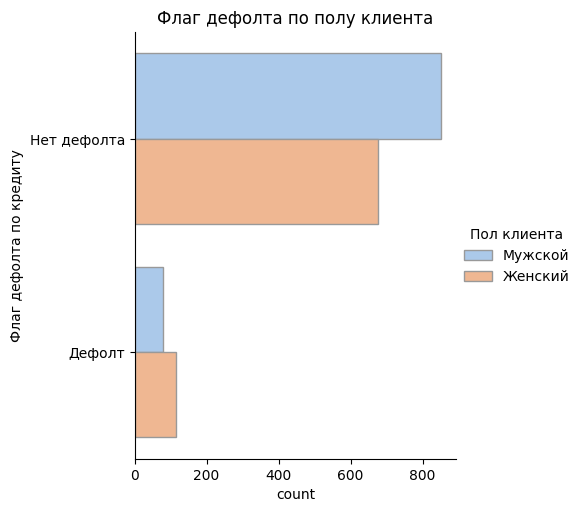

In [ ]:
sns.catplot(data=df, y='Флаг дефолта по кредиту', hue='Пол клиента', kind="count", palette="pastel", edgecolor=".6",)
plt.title('Флаг дефолта по полу клиента');

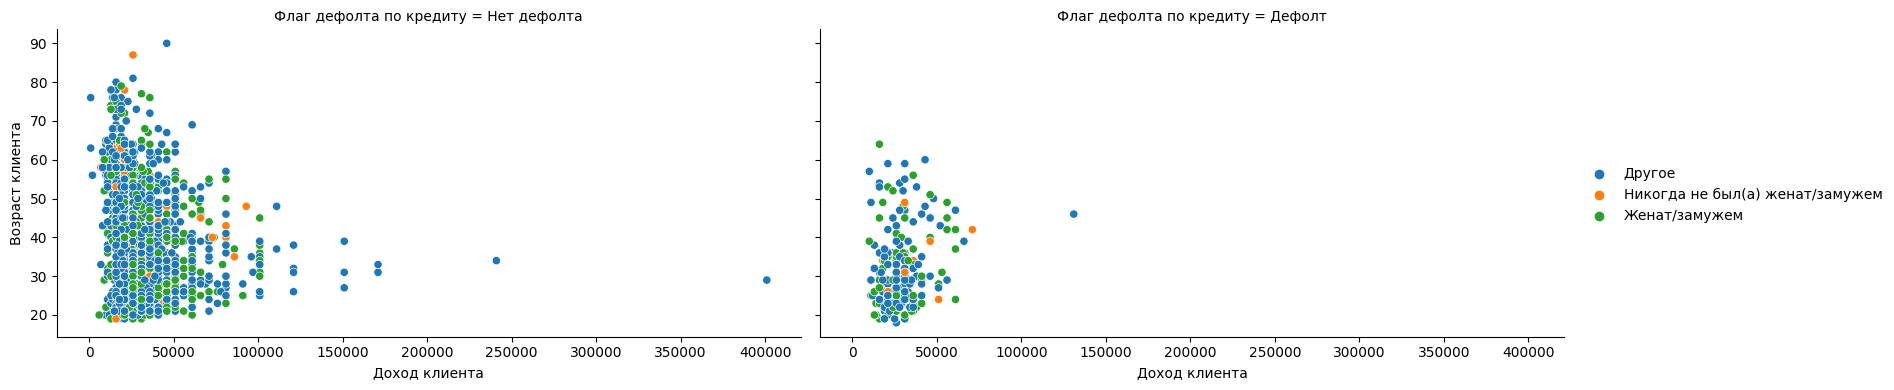

In [ ]:
g = sns.FacetGrid(df, col='Флаг дефолта по кредиту', height=4, aspect=2.0)
g.map_dataframe(sns.scatterplot, x='Доход клиента', y='Возраст клиента', hue='Семейное положение')
g.add_legend();

Выведем попарное распределение признаков датасета с раскраской по наличию дефолта

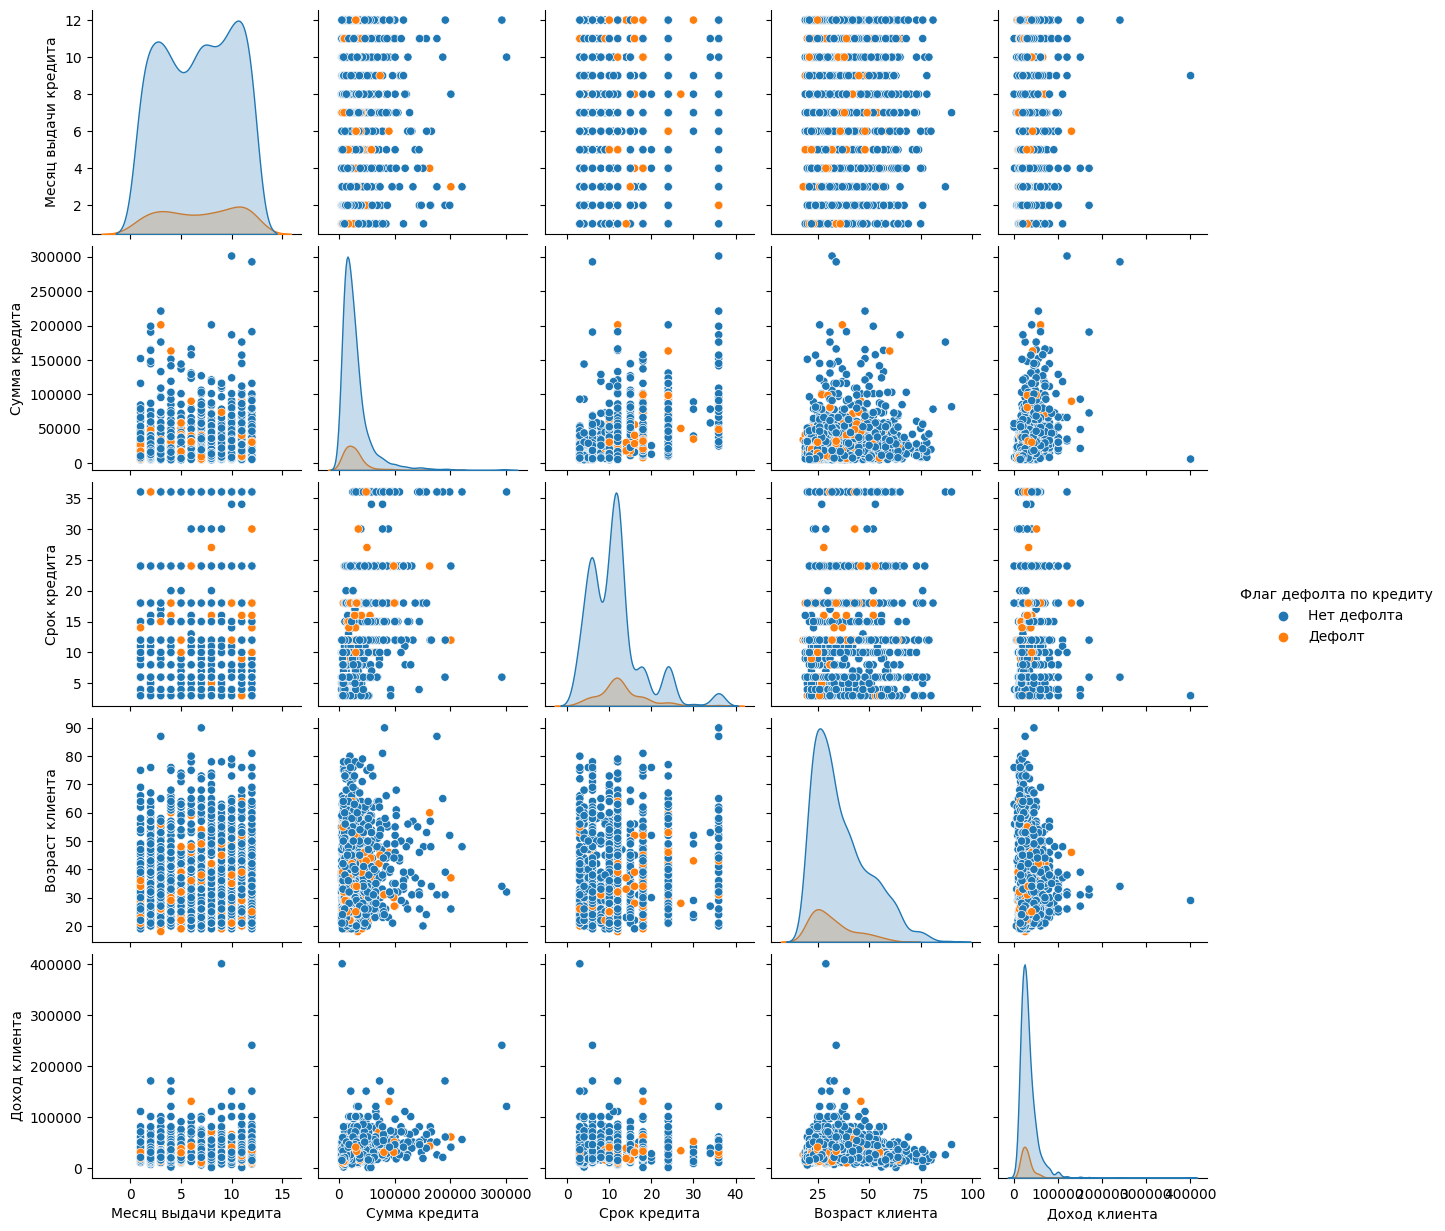

In [ ]:
sns.pairplot(df, hue='Флаг дефолта по кредиту', diag_kind="kde");

Визуально видно, что нет признаков которые могут самостоятельно отделить два класса друг от друга.

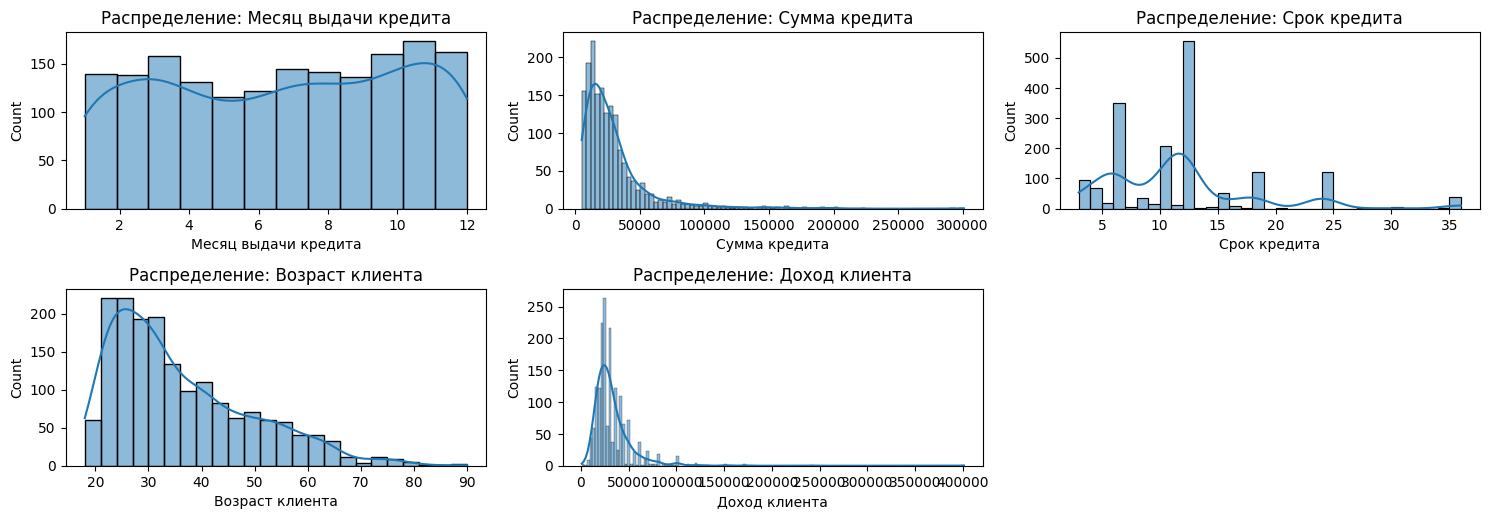

In [ ]:
# построим графики распределения
categorials = list(df.dtypes[df.dtypes == object].index)
integer = [f for f in df if f not in (categorials)]
plt.figure(figsize=(15,10))
for i,col in enumerate(df[integer].columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Распределение: {col}')
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

Визуально видно, что нет идеального нормального распределения. У некоторых признаков видны выбросы.

### Выбросы

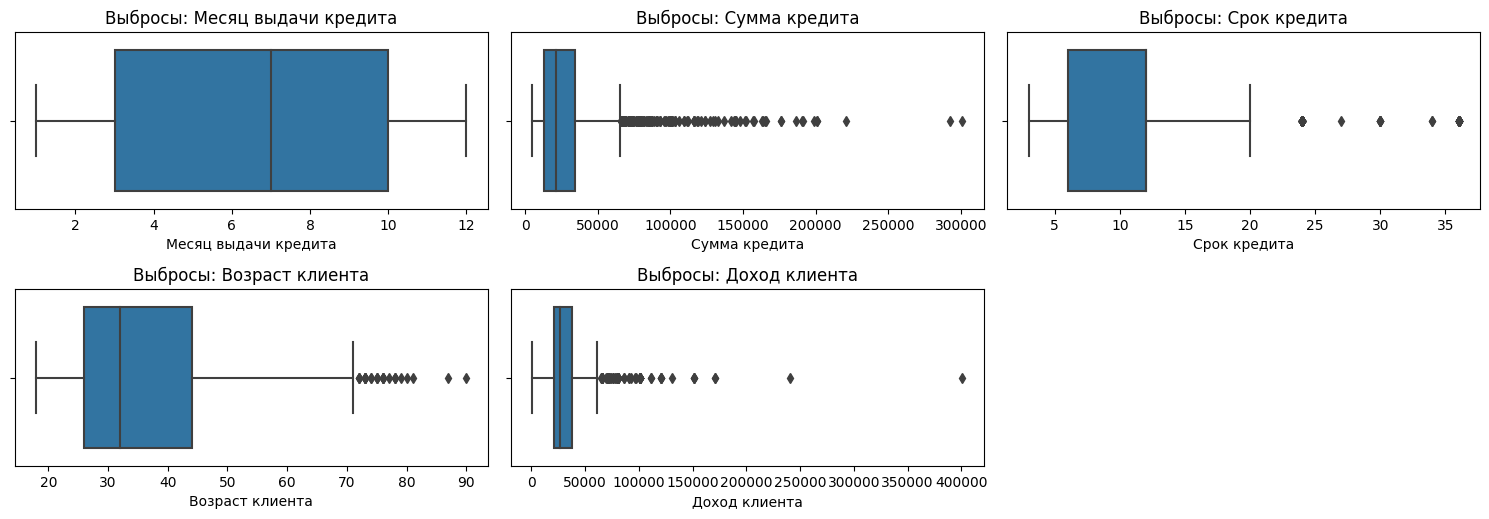

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df[integer].columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Выбросы: {col}')
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.plot()

По четырём признакам присутствуют выбросы

In [ ]:
df[integer].describe()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,6.708067,29264.654672,11.546721,35.911782,32652.350551
std,3.538420,27926.778301,6.548354,13.120203,20913.193158
min,1.000000,5000.000000,3.000000,18.000000,1000.000000
25%,3.000000,13000.000000,6.000000,26.000000,21000.000000
50%,7.000000,21500.000000,12.000000,32.000000,27000.000000
75%,10.000000,34000.000000,12.000000,44.000000,38000.000000
max,12.000000,301000.000000,36.000000,90.000000,401000.000000


### Корреляция признаков

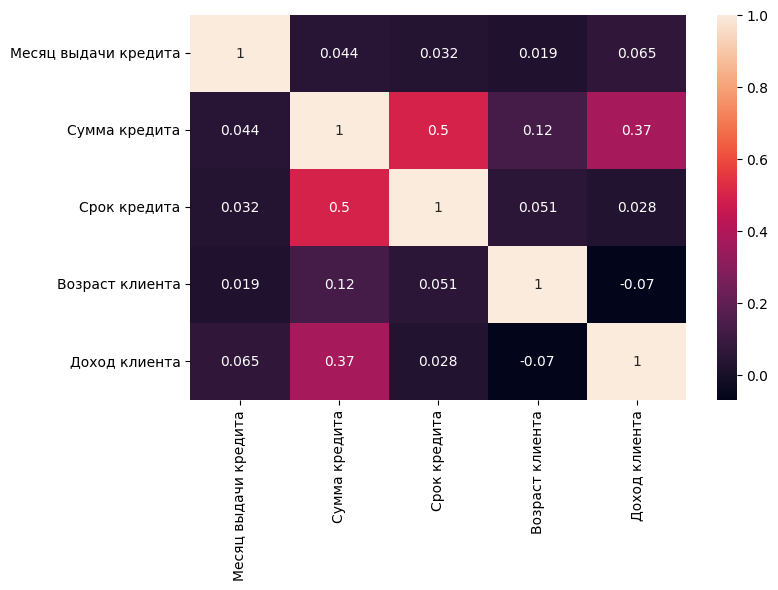

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[integer].corr(), annot=True);

Из корреляционной матрицы (коэф.Пирмана) видно, что в целом линейная связь между признаками умеренная.

Можно удалить признак 'Месяц выдачи кредита' с незначительными связями.

## Baseline

### Преобразование категориальных признаков

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Месяц выдачи кредита        1723 non-null   int64 
 1   Сумма кредита               1723 non-null   int64 
 2   Срок кредита                1723 non-null   int64 
 3   Возраст клиента             1723 non-null   int64 
 4   Пол клиента                 1723 non-null   object
 5   Образование клиента         1723 non-null   object
 6   Тип товара                  1723 non-null   object
 7   Наличие детей у клиента     1723 non-null   object
 8   Регион выдачи кредита       1723 non-null   object
 9   Доход клиента               1723 non-null   int64 
 10  Семейное положение          1723 non-null   object
 11  Оператор связи              1723 non-null   object
 12  Является ли клиентом банка  1723 non-null   object
 13  Флаг дефолта по кредиту     1723 non-null   obje

In [ ]:
categorials = list(df.dtypes[df.dtypes == object].index)
categorials

['Пол клиента',
 'Образование клиента',
 'Тип товара',
 'Наличие детей у клиента',
 'Регион выдачи кредита',
 'Семейное положение',
 'Оператор связи',
 'Является ли клиентом банка',
 'Флаг дефолта по кредиту']

In [ ]:
dummy_data = pd.get_dummies(df[categorials], columns=categorials)

In [ ]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 47 columns):
 #   Column                                                                      Non-Null Count  Dtype
---  ------                                                                      --------------  -----
 0   Пол клиента_Женский                                                         1723 non-null   uint8
 1   Пол клиента_Мужской                                                         1723 non-null   uint8
 2   Образование клиента_Высшее                                                  1723 non-null   uint8
 3   Образование клиента_Неоконченное высшее                                     1723 non-null   uint8
 4   Образование клиента_Неоконченное среднее                                    1723 non-null   uint8
 5   Образование клиента_Несколько высших или более высокая ступень образования  1723 non-null   uint8
 6   Образование клиента_Среднее                                     

In [ ]:
dummy_data=dummy_data.drop(['Пол клиента_Женский', 'Является ли клиентом банка_Клиент банка', 'Флаг дефолта по кредиту_Дефолт', 'Флаг дефолта по кредиту_Нет дефолта'], axis=1)

In [ ]:
#отфильтруем непрерывные признаки
integer = [f for f in df if f not in (categorials)]

In [ ]:
integer

['Месяц выдачи кредита',
 'Сумма кредита',
 'Срок кредита',
 'Возраст клиента',
 'Доход клиента']

In [ ]:
df_ = pd.concat([df[integer], dummy_data], axis=1)
df_.head(1)

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента,Пол клиента_Мужской,Образование клиента_Высшее,Образование клиента_Неоконченное высшее,Образование клиента_Неоконченное среднее,Образование клиента_Несколько высших или более высокая ступень образования,...,Регион выдачи кредита_Санкт-Петербург или ЛО,Семейное положение_Другое,Семейное положение_Женат/замужем,Семейное положение_Никогда не был(а) женат/замужем,Оператор связи_Билайн,Оператор связи_Другой,Оператор связи_МТС,Оператор связи_Мегафон,Оператор связи_Теле2,Является ли клиентом банка_Не клиент банка
0,1,7000,12,39,21000,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
X = df_
X.shape

(1723, 48)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['Флаг дефолта по кредиту'])

LabelEncoder()

In [ ]:
 # пример расшифровки
le.transform( ['Нет дефолта', 'Дефолт'])

array([1, 0])

In [ ]:
y = pd.Series (le.transform(df['Флаг дефолта по кредиту']))


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

### Составление тренировочного и валидационного множества для необработанных данных

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# 60% данных распределяем в обучающую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.6,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
# по 20% данных распределяем в валидационную и тестовую выборки
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [ ]:
print('Размер исходной выборки:', df.shape[0])
print('Размер обучающей выборки:', X_train.shape[0])
print('Размер валидационной выборки:', X_val.shape[0])
print('Размер тестовой выборки:', X_test.shape[0])

Размер исходной выборки: 1723
Размер обучающей выборки: 1033
Размер валидационной выборки: 345
Размер тестовой выборки: 345


### Построение базовой модели на "грязных" данных

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
le.inverse_transform([0,1])

array(['Дефолт', 'Нет дефолта'], dtype=object)

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    'LogisticRegression',
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "Naive Bayes",
]

classifiers = [
    LogisticRegression(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
]


for name, clf in zip(names, classifiers):

    clf = make_pipeline(StandardScaler(with_mean=False), clf)
    clf.fit(X_train, y_train)



    print(name)
    print(classification_report(y_val, clf.predict(X_val), target_names=['Дефолт', 'Нет дефолта']))

LogisticRegression
              precision    recall  f1-score   support

      Дефолт       0.20      0.56      0.29        39
 Нет дефолта       0.93      0.71      0.80       306

    accuracy                           0.69       345
   macro avg       0.56      0.64      0.55       345
weighted avg       0.84      0.69      0.75       345

Nearest Neighbors
              precision    recall  f1-score   support

      Дефолт       0.19      0.08      0.11        39
 Нет дефолта       0.89      0.96      0.92       306

    accuracy                           0.86       345
   macro avg       0.54      0.52      0.52       345
weighted avg       0.81      0.86      0.83       345

Linear SVM
              precision    recall  f1-score   support

      Дефолт       0.00      0.00      0.00        39
 Нет дефолта       0.89      1.00      0.94       306

    accuracy                           0.89       345
   macro avg       0.44      0.50      0.47       345
weighted avg       0.79   

В качестве базовой модели выбираю LogisticRegression. Выбор сделан исходя из макро-оценки F1.

In [ ]:
baseline = LogisticRegression(random_state=42, class_weight='balanced')
baseline.fit(X_train, y_train)
pred_baseline=baseline.predict(X_val)
f1_baseline=f1_score(y_val, pred_baseline, average='macro')
f1_baseline

0.4819420914831357

## Обработка данных

### Удаление выбросов

##### интерквантильный разброс

In [ ]:
df_iqr=df.copy()

In [ ]:
q1 = df['Сумма кредита'].quantile(0.25)
q3 = df['Сумма кредита'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df_iqr.drop(df_iqr[~df_iqr['Сумма кредита'].between(lower_bound, upper_bound, inclusive=True)].index,inplace=True)

In [ ]:
q1 = df['Срок кредита'].quantile(0.25)
q3 = df['Срок кредита'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df_iqr.drop(df_iqr[~df_iqr['Срок кредита'].between(lower_bound, upper_bound, inclusive=True)].index,inplace=True)

In [ ]:
q1 = df['Возраст клиента'].quantile(0.25)
q3 = df['Возраст клиента'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df_iqr.drop(df_iqr[~df_iqr['Возраст клиента'].between(lower_bound, upper_bound, inclusive=True)].index,inplace=True)

In [ ]:
q1 = df['Доход клиента'].quantile(0.25)
q3 = df['Доход клиента'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df_iqr.drop(df_iqr[~df_iqr['Доход клиента'].between(lower_bound, upper_bound, inclusive=True)].index,inplace=True)

In [ ]:
losses_dict = {'Нет дефолта': round(100 * (len(df[df['Флаг дефолта по кредиту'] == 'Нет дефолта']) - len(df_iqr[df_iqr['Флаг дефолта по кредиту'] == 'Нет дефолта']))/len(df[df['Флаг дефолта по кредиту'] == 'Нет дефолта'])),
               'Дефолт': round(100 * (len(df[df['Флаг дефолта по кредиту'] == 'Дефолт']) - len(df_iqr[df_iqr['Флаг дефолта по кредиту'] == 'Дефолт']))/len(df[df['Флаг дефолта по кредиту'] == 'Дефолт'])),
               'Всего': round(100 * (len(df) - len(df_iqr))/len(df))}
losses = pd.Series(losses_dict)
df_1 = pd.DataFrame(losses, columns=['losses_iqr, %'])
df_1

,"losses_iqr, %"
Нет дефолта,19
Дефолт,11
Всего,19


In [ ]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 1721
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Месяц выдачи кредита        1404 non-null   int64 
 1   Сумма кредита               1404 non-null   int64 
 2   Срок кредита                1404 non-null   int64 
 3   Возраст клиента             1404 non-null   int64 
 4   Пол клиента                 1404 non-null   object
 5   Образование клиента         1404 non-null   object
 6   Тип товара                  1404 non-null   object
 7   Наличие детей у клиента     1404 non-null   object
 8   Регион выдачи кредита       1404 non-null   object
 9   Доход клиента               1404 non-null   int64 
 10  Семейное положение          1404 non-null   object
 11  Оператор связи              1404 non-null   object
 12  Является ли клиентом банка  1404 non-null   object
 13  Флаг дефолта по кредиту     1404 non-null   obje

In [ ]:
categorials = list(df_iqr.dtypes[df_iqr.dtypes == object].index)
categorials

['Пол клиента',
 'Образование клиента',
 'Тип товара',
 'Наличие детей у клиента',
 'Регион выдачи кредита',
 'Семейное положение',
 'Оператор связи',
 'Является ли клиентом банка',
 'Флаг дефолта по кредиту']

In [ ]:
dummy_data = pd.get_dummies(df_iqr[categorials], columns=categorials)

In [ ]:
dummy_data=dummy_data.drop(['Пол клиента_Женский', 'Является ли клиентом банка_Клиент банка', 'Флаг дефолта по кредиту_Дефолт', 'Флаг дефолта по кредиту_Нет дефолта'], axis=1)

In [ ]:
#отфильтруем непрерывные признаки
integer = [f for f in df_iqr if f not in (categorials)]

In [ ]:
df_iqr_ = pd.concat([df_iqr[integer], dummy_data], axis=1)
df_iqr_.head(1)

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента,Пол клиента_Мужской,Образование клиента_Высшее,Образование клиента_Неоконченное высшее,Образование клиента_Неоконченное среднее,Образование клиента_Несколько высших или более высокая ступень образования,...,Регион выдачи кредита_Санкт-Петербург или ЛО,Семейное положение_Другое,Семейное положение_Женат/замужем,Семейное положение_Никогда не был(а) женат/замужем,Оператор связи_Билайн,Оператор связи_Другой,Оператор связи_МТС,Оператор связи_Мегафон,Оператор связи_Теле2,Является ли клиентом банка_Не клиент банка
0,1,7000,12,39,21000,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
X = df_iqr_
X.shape

(1404, 48)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_iqr['Флаг дефолта по кредиту'])

LabelEncoder()

In [ ]:
y = pd.Series (le.transform(df_iqr['Флаг дефолта по кредиту']))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((842, 48), (562, 48))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [ ]:
X_test.shape, X_val.shape

((281, 48), (281, 48))

In [ ]:
iqr = LogisticRegression(random_state=42, class_weight='balanced')
iqr.fit(X_train, y_train)
pred_iqr = iqr.predict(X_val)
f1_iqr = f1_score(y_val, pred_iqr, average='macro')
f1_iqr

0.5041377631739077

In [ ]:
print('В результате удаления выбросов методом iqr:')
print('- потеряно 19% данных (это много!), но по меньшему классу "дефолт" потери составили 11% - можно считать приемлемым')
print('- метрика f1 улучшилась на', round((f1_iqr-f1_baseline)*100), '%')

В результате удаления выбросов методом iqr:
- потеряно 19% данных (это много!), но по меньшему классу "дефолт" потери составили 11% - можно считать приемлемым
- метрика f1 улучшилась на 2 %


##### OCSVM

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn import svm

In [ ]:
df_OCSVM=df.copy()

In [ ]:
X = df_
X.shape

(1723, 48)

In [ ]:
model_OCSVM = svm.OneClassSVM(nu=0.07)
model_OCSVM.fit(X)

OneClassSVM(nu=0.07)

In [ ]:
df_OCSVM['OCSVM']=pd.Series(model_OCSVM.predict(X))
df_OCSVM['OCSVM'].value_counts()

 1    1603
-1     120
Name: OCSVM, dtype: int64

In [ ]:
df_OCSVM.drop(df_OCSVM[df_OCSVM['OCSVM'] == -1].index, inplace = True)

In [ ]:
df_OCSVM.drop(['OCSVM'], axis=1, inplace = True)

In [ ]:
losses_dict = {'Нет дефолта': round(100 * (len(df[df['Флаг дефолта по кредиту'] == 'Нет дефолта']) - len(df_OCSVM[df_OCSVM['Флаг дефолта по кредиту'] == 'Нет дефолта']))/len(df[df['Флаг дефолта по кредиту'] == 'Нет дефолта'])),
               'Дефолт': round(100 * (len(df[df['Флаг дефолта по кредиту'] == 'Дефолт']) - len(df_OCSVM[df_OCSVM['Флаг дефолта по кредиту'] == 'Дефолт']))/len(df[df['Флаг дефолта по кредиту'] == 'Дефолт'])),
               'Всего': round(100 * (len(df) - len(df_OCSVM))/len(df))}
losses = pd.Series(losses_dict)
df_2 = pd.DataFrame(losses, columns=['losses_OCSVM, %'])
df_2

,"losses_OCSVM, %"
Нет дефолта,7
Дефолт,5
Всего,7


In [ ]:
df_OCSVM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Месяц выдачи кредита        1603 non-null   int64 
 1   Сумма кредита               1603 non-null   int64 
 2   Срок кредита                1603 non-null   int64 
 3   Возраст клиента             1603 non-null   int64 
 4   Пол клиента                 1603 non-null   object
 5   Образование клиента         1603 non-null   object
 6   Тип товара                  1603 non-null   object
 7   Наличие детей у клиента     1603 non-null   object
 8   Регион выдачи кредита       1603 non-null   object
 9   Доход клиента               1603 non-null   int64 
 10  Семейное положение          1603 non-null   object
 11  Оператор связи              1603 non-null   object
 12  Является ли клиентом банка  1603 non-null   object
 13  Флаг дефолта по кредиту     1603 non-null   obje

In [ ]:
categorials = list(df_OCSVM.dtypes[df_OCSVM.dtypes == object].index)
categorials

['Пол клиента',
 'Образование клиента',
 'Тип товара',
 'Наличие детей у клиента',
 'Регион выдачи кредита',
 'Семейное положение',
 'Оператор связи',
 'Является ли клиентом банка',
 'Флаг дефолта по кредиту']

In [ ]:
dummy_data = pd.get_dummies(df_OCSVM[categorials], columns=categorials)

In [ ]:
dummy_data=dummy_data.drop(['Пол клиента_Женский', 'Является ли клиентом банка_Клиент банка', 'Флаг дефолта по кредиту_Дефолт', 'Флаг дефолта по кредиту_Нет дефолта'], axis=1)

In [ ]:
#отфильтруем непрерывные признаки
integer = [f for f in df_OCSVM if f not in (categorials)]

In [ ]:
df_OCSVM_ = pd.concat([df_OCSVM[integer], dummy_data], axis=1)
df_OCSVM_.head(1)

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента,Пол клиента_Мужской,Образование клиента_Высшее,Образование клиента_Неоконченное высшее,Образование клиента_Неоконченное среднее,Образование клиента_Несколько высших или более высокая ступень образования,...,Регион выдачи кредита_Санкт-Петербург или ЛО,Семейное положение_Другое,Семейное положение_Женат/замужем,Семейное положение_Никогда не был(а) женат/замужем,Оператор связи_Билайн,Оператор связи_Другой,Оператор связи_МТС,Оператор связи_Мегафон,Оператор связи_Теле2,Является ли клиентом банка_Не клиент банка
0,1,7000,12,39,21000,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
X = df_OCSVM_
X.shape

(1603, 48)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_OCSVM['Флаг дефолта по кредиту'])

LabelEncoder()

In [ ]:
y = pd.Series (le.transform(df_OCSVM['Флаг дефолта по кредиту']))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((961, 48), (642, 48))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [ ]:
X_test.shape, X_val.shape

((321, 48), (321, 48))

In [ ]:
OCSVM = LogisticRegression(random_state=42, class_weight='balanced')
OCSVM.fit(X_train, y_train)
pred_OCSVM=OCSVM.predict(X_val)
f1_OCSVM=f1_score(y_val, pred_OCSVM, average='macro')
f1_OCSVM

0.5376543209876543

In [ ]:
print('В результате удаления выбросов методом OCSVM:')
print('- потеряно 7% данных (это в пределах нормы)')
# print('- полностью удалены два признака по образованию клиента ("неоконченное среднее" и "несколько высших...") и два признака по типу товара ("музыка" и "рыболовные...")')
print('- метрика f1 улучшилась на', round((f1_OCSVM-f1_baseline)*100), '%')

В результате удаления выбросов методом OCSVM:
- потеряно 7% данных (это в пределах нормы)
- метрика f1 улучшилась на 6 %


#### Итого по выбросам

In [ ]:
data = {'f1 macro avg':['0.48', '0.50', '0.54']}
df_res = pd.DataFrame(data, index =['Baseline', 'Baseline + выбросы_iqr', 'Baseline + выбросы_OCSVM'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,f1 macro avg
Baseline,0.48
Baseline + выбросы_iqr,0.50
Baseline + выбросы_OCSVM,0.54


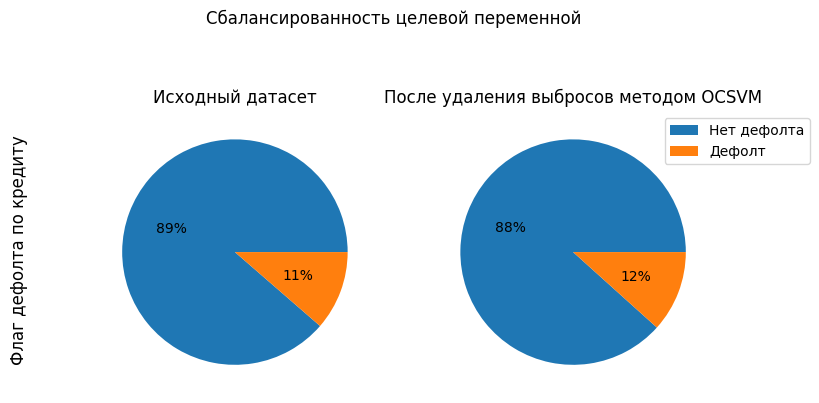

In [ ]:
fig = plt.figure(figsize = (8,5))

fig.suptitle('Сбалансированность целевой переменной')
fig.supylabel('Флаг дефолта по кредиту')

ax1 = fig.add_subplot(122, title = 'После удаления выбросов методом OCSVM')
df_OCSVM['Флаг дефолта по кредиту'].value_counts().plot(kind='pie', autopct='%1.0f%%', labeldistance=None)
ax1.axes.yaxis.set_visible(False)

ax2 = fig.add_subplot(121, title = 'Исходный датасет')
df['Флаг дефолта по кредиту'].value_counts().plot(kind='pie', autopct='%1.0f%%', labeldistance=None)
ax2.axes.yaxis.set_visible(False)

plt.legend(bbox_to_anchor=(2, 1), loc='upper left');

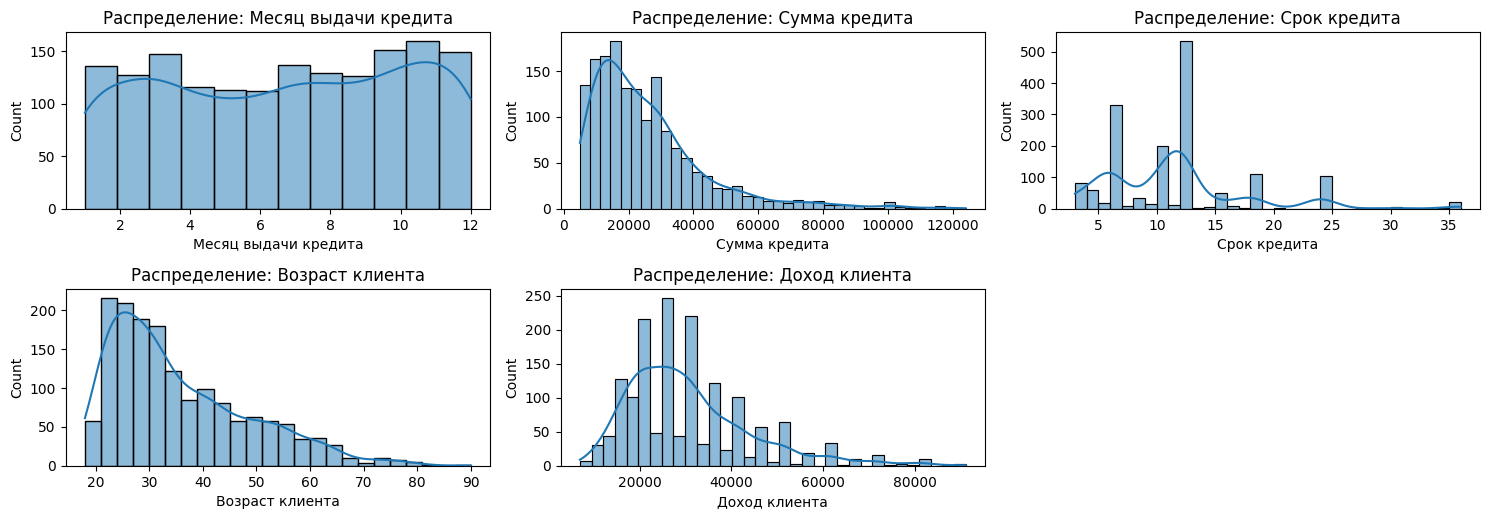

In [ ]:
# построим графики распределения
categorials = list(df_OCSVM.dtypes[df_OCSVM.dtypes == object].index)
integer = [f for f in df_OCSVM if f not in (categorials)]
plt.figure(figsize=(15,10))
for i,col in enumerate(df_OCSVM[integer].columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Распределение: {col}')
    sns.histplot(df_OCSVM[col],kde=True)
    plt.tight_layout()
    plt.plot()

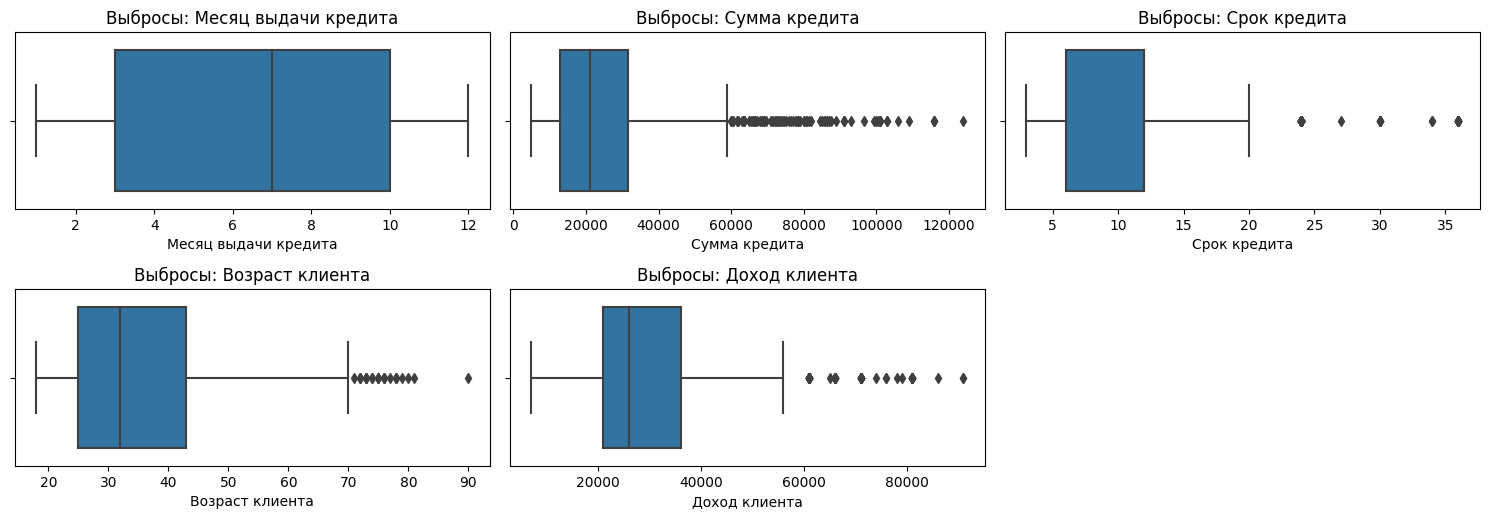

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df_OCSVM[integer].columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Выбросы: {col}')
    sns.boxplot(x=df_OCSVM[col])
    plt.tight_layout()
    plt.plot()

### Feature Selection

#### отсечение низковариативных признаков (VarianceThreshold).

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var = VarianceThreshold(threshold=0.6)
df_FS = var.fit_transform(X)
df_FS.shape

(1603, 5)

In [ ]:
df_FS = pd.DataFrame(df_FS)
df_FS.head(1)

,0,1,2,3,4
0,1,7000,12,39,21000


In [ ]:
X_1 = df_FS
X_1.shape[1]

5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((961, 5), (642, 5))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [ ]:
X_test.shape, X_val.shape

((321, 5), (321, 5))

In [ ]:
FS_1 = LogisticRegression(random_state=42, class_weight='balanced')
FS_1.fit(X_train, y_train)
pred_FS_1=FS_1.predict(X_val)
f1_FS_1=f1_score(y_val, pred_FS_1, average='macro')
f1_FS_1

0.5398948877209746

In [ ]:
print('- метрика f1 улучшилась на', round((f1_FS_1-f1_OCSVM)*100,1), '%')

- метрика f1 улучшилась на 0.2 %


####  скоринговая функция для классификации f_classif (SelectKBest(f_classif, k=10)).

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
X_2 = SelectKBest(f_classif, k=10).fit_transform(X, y)
X_2.shape[1]

10

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((961, 10), (642, 10))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [ ]:
X_test.shape, X_val.shape

((321, 10), (321, 10))

In [ ]:
FS_2 = LogisticRegression(random_state=42, class_weight='balanced')
FS_2.fit(X_train, y_train)
pred_FS_2=FS_2.predict(X_val)
f1_FS_2=f1_score(y_val, pred_FS_2, average='macro')
f1_FS_2

0.5717552887364208

In [ ]:
print('- метрика f1 улучшилась на', round((f1_FS_2-f1_OCSVM)*100,1), '%')

- метрика f1 улучшилась на 3.4 %


#### отбор признаков с помощью логистической регрессии

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [ ]:
L_SVC = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
selector = SelectFromModel(L_SVC, prefit=True)
X_3 = selector.transform(X)
X_3.shape[1]

15

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_3,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((961, 15), (642, 15))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [ ]:
X_test.shape, X_val.shape

((321, 15), (321, 15))

In [ ]:
FS_3 = LogisticRegression(random_state=42, class_weight='balanced')
FS_3.fit(X_train, y_train)
pred_FS_3=FS_3.predict(X_val)
f1_FS_3=f1_score(y_val, pred_FS_3, average='macro')
f1_FS_3

0.5929787261293339

In [ ]:
print('- метрика f1 улучшилась на', round((f1_FS_3-f1_OCSVM)*100,1), '%')

- метрика f1 улучшилась на 5.5 %


#### перебор признаков SequentialFeatureSelector

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=1), n_features_to_select=2, direction="forward"
).fit(X, y)

In [ ]:
X_4 = sfs_forward.transform(X)
X_4.shape[1]

2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_4,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((961, 2), (642, 2))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [ ]:
X_test.shape, X_val.shape

((321, 2), (321, 2))

In [ ]:
FS_4 = LogisticRegression(random_state=42, class_weight='balanced')
FS_4.fit(X_train, y_train)
pred_FS_4=FS_4.predict(X_val)
f1_FS_4=f1_score(y_val, pred_FS_4, average='macro')
f1_FS_4

0.4171864319890636

In [ ]:
print('- метрика f1 ухудшилась на', round((f1_OCSVM-f1_FS_4)*100,1), '%')

- метрика f1 ухудшилась на 12.0 %


### Оптимизация гиперпараметров модели

In [ ]:
FS_3.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hyperparams = {
    'class_weight':[None, 'balanced'],
    'penalty':[None, 'l2', 'l1', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 150, 200],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

grid = GridSearchCV(FS_3, hyperparams, cv=4, n_jobs=-1).fit(X_train, y_train)
print('Оптимальные параметры для grid:')
print(grid.best_score_, grid.best_params_)

Оптимальные параметры для grid:
0.883454356846473 {'class_weight': None, 'max_iter': 50, 'multi_class': 'auto', 'penalty': None, 'solver': 'newton-cg'}


In [ ]:
model_grid = LogisticRegression(random_state=42, class_weight=None, max_iter = 50, multi_class = 'auto', penalty = None, solver = 'lbfgs')
model_grid.fit(X_train, y_train)
pred_model_grid=model_grid.predict(X_val)

In [ ]:
print(classification_report(y_val, pred_model_grid, target_names=['Дефолт', 'Нет дефолта']))

              precision    recall  f1-score   support

      Дефолт       0.00      0.00      0.00        38
 Нет дефолта       0.88      1.00      0.94       283

    accuracy                           0.88       321
   macro avg       0.44      0.50      0.47       321
weighted avg       0.78      0.88      0.83       321



In [ ]:
f1_model_grid=f1_score(y_val, pred_model_grid, average='macro')
f1_model_grid

0.4685430463576159

### Итого по моделям

In [ ]:
data = {'f1 macro avg':['0.48', '0.54', '0.59', '0.47']}
df_res = pd.DataFrame(data, index =['Baseline', 'Baseline + выбросы_OCSVM', 'Baseline + выбросы_OCSVM + Feature Selection', 'Baseline + OCSVM + Feature Selection + оптимизация'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,f1 macro avg
Baseline,0.48
Baseline + выбросы_OCSVM,0.54
Baseline + выбросы_OCSVM + Feature Selection,0.59
Baseline + OCSVM + Feature Selection + оптимизация,0.47


## Работа с признаками

#### Преобразование признаков

In [ ]:
df_1=df_OCSVM

##### Возраст клиента

In [ ]:
age_labels = ['0-25','26-45','46-55', '56-100']
age_bins = [0, 25, 45, 55, 100]

df_1['Age_bin'] = pd.cut(df_1['Возраст клиента'],
                       bins=age_bins,
                       labels=age_labels)
df_1[['Возраст клиента', 'Age_bin']].head()

,Возраст клиента,Age_bin
0,39,26-45
1,20,0-25
2,23,0-25
3,30,26-45
4,25,0-25


In [ ]:
df_1['Age_bin'].value_counts()

26-45     841
0-25      418
46-55     193
56-100    151
Name: Age_bin, dtype: int64

In [ ]:
df_1.groupby(['Age_bin']).agg({'Возраст клиента':'median'}).reset_index()

,Age_bin,Возраст клиента
0,0-25,23.0
1,26-45,32.0
2,46-55,50.0
3,56-100,62.0


In [ ]:
df_1.isna().sum()

Месяц выдачи кредита          0
Сумма кредита                 0
Срок кредита                  0
Возраст клиента               0
Пол клиента                   0
Образование клиента           0
Тип товара                    0
Наличие детей у клиента       0
Регион выдачи кредита         0
Доход клиента                 0
Семейное положение            0
Оператор связи                0
Является ли клиентом банка    0
Флаг дефолта по кредиту       0
Age_bin                       0
dtype: int64

##### Доход клиента

In [ ]:
income_labels = ['5000-10000','10100-20000', '20100-50000', '50100-100000']
income_bins = [5000, 10000, 20000, 50000, 100000]

df_1['Income_bin'] = pd.cut(df_1['Доход клиента'],
                       bins=income_bins,
                       labels=income_labels)
df_1[['Доход клиента', 'Income_bin']].head()

,Доход клиента,Income_bin
0,21000,20100-50000
1,17000,10100-20000
2,31000,20100-50000
3,31000,20100-50000
4,26000,20100-50000


In [ ]:
df_1['Income_bin'].value_counts()

20100-50000     1110
10100-20000      315
50100-100000     165
5000-10000        13
Name: Income_bin, dtype: int64

In [ ]:
df_1.groupby(['Income_bin']).agg({'Доход клиента':'median'}).reset_index()

,Income_bin,Доход клиента
0,5000-10000,9000.0
1,10100-20000,16000.0
2,20100-50000,31000.0
3,50100-100000,56000.0


In [ ]:
df_1.isna().sum()

Месяц выдачи кредита          0
Сумма кредита                 0
Срок кредита                  0
Возраст клиента               0
Пол клиента                   0
Образование клиента           0
Тип товара                    0
Наличие детей у клиента       0
Регион выдачи кредита         0
Доход клиента                 0
Семейное положение            0
Оператор связи                0
Является ли клиентом банка    0
Флаг дефолта по кредиту       0
Age_bin                       0
Income_bin                    0
dtype: int64

#### Добавление новых признаков

In [ ]:
df_1.to_csv (r'df_1.csv', index = None, header=True)

In [ ]:
import pandas as pd

In [ ]:
df_1=pd.read_csv('df_1.csv')

##### Коэффициент минимальных расходов

[Источник](https://ce.pnzgu.ru/files/ce.pnzgu.ru/ump_ocenka_kreditosposobnosti_zaemschika_kommercheskogo_banka_1_.pdf)

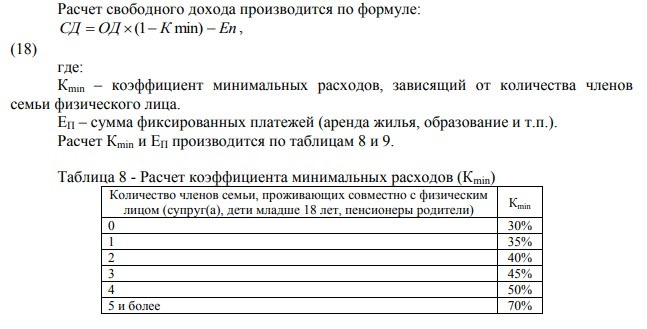

In [ ]:
df_1['Семейное положение'].unique()

array(['Другое', 'Никогда не был(а) женат/замужем', 'Женат/замужем'],
      dtype=object)

In [ ]:
df_1['Наличие детей у клиента'].unique()

array(['Детей нет', 'Дети есть'], dtype=object)

In [ ]:
temp=df_1.copy()

In [ ]:
temp = temp.replace({'Семейное положение':{'Другое':0.3, 'Никогда не был(а) женат/замужем':0.3, 'Женат/замужем':0.35}, 'Наличие детей у клиента':{'Детей нет':0, 'Дети есть':0.05}})


In [ ]:
temp['Семейное положение'].unique()

array([0.3 , 0.35])

In [ ]:
temp['Наличие детей у клиента'].unique()

array([0.  , 0.05])

In [ ]:
df_1['K_min'] = temp['Семейное положение'] + temp['Наличие детей у клиента']

In [ ]:
df_1[['K_min', 'Семейное положение', 'Наличие детей у клиента']].head(15)

,K_min,Семейное положение,Наличие детей у клиента
0,0.30,Другое,Детей нет
1,0.35,Другое,Дети есть
2,0.30,Другое,Детей нет
3,0.35,Никогда не был(а) женат/замужем,Дети есть
4,0.35,Женат/замужем,Детей нет
5,0.35,Женат/замужем,Детей нет
6,0.30,Другое,Детей нет
7,0.35,Женат/замужем,Детей нет
8,0.30,Другое,Детей нет
9,0.35,Другое,Дети есть


##### Показатель долговой нагрузки

In [ ]:
df_1['Показатель долговой нагрузки'] = round(((df_1['Сумма кредита']/df_1['Срок кредита'])/(df_1['Доход клиента']*(1-df_1['K_min'])))*100,1)

In [ ]:
print('Уникальные значения по Показатель долговой нагрузки')
df_1_=df_1['Показатель долговой нагрузки'].unique()
df_1_.sort()
print(df_1_)
print('---------------------------')
print('Распределение уникальных значений по Показатель долговой нагрузки')
print(df_1['Показатель долговой нагрузки'].value_counts())

Уникальные значения по Показатель долговой нагрузки
[  2.    2.1   2.4   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4
   3.5   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6
   4.7   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8
   5.9   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.
   7.1   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2
   8.3   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4
   9.5   9.6   9.7   9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6
  10.7  10.8  10.9  11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8
  11.9  12.   12.1  12.2  12.3  12.4  12.5  12.6  12.8  12.9  13.   13.1
  13.2  13.3  13.4  13.5  13.6  13.7  13.8  13.9  14.   14.1  14.2  14.3
  14.4  14.5  14.6  14.7  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.5
  15.6  15.7  15.8  15.9  16.   16.1  16.2  16.3  16.4  16.5  16.6  16.7
  16.8  16.9  17.   17.1  17.2  17.3  17.4  17.5  17.6  17.7  17.8  17.9


In [ ]:
df_1.isna().sum()

Месяц выдачи кредита            0
Сумма кредита                   0
Срок кредита                    0
Возраст клиента                 0
Пол клиента                     0
Образование клиента             0
Тип товара                      0
Наличие детей у клиента         0
Регион выдачи кредита           0
Доход клиента                   0
Семейное положение              0
Оператор связи                  0
Является ли клиентом банка      0
Флаг дефолта по кредиту         0
Age_bin                         0
Income_bin                      0
K_min                           0
Показатель долговой нагрузки    0
dtype: int64

In [ ]:
df_1[df_1['Показатель долговой нагрузки'] > 80]

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту,Age_bin,Income_bin,K_min,Показатель долговой нагрузки
601,5,29500,3,22,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,16000,Другое,МТС,Клиент банка,Нет дефолта,0-25,10100-20000,0.35,94.6
1072,9,39000,3,60,Мужской,Среднее специальное,"Окна, двери",Детей нет,Москва или МО,15000,Другое,Билайн,Не клиент банка,Нет дефолта,56-100,10100-20000,0.30,123.8
1188,10,19000,4,60,Мужской,Среднее специальное,Мебель,Детей нет,Другие регионы,9000,Женат/замужем,Мегафон,Не клиент банка,Нет дефолта,56-100,5000-10000,0.35,81.2


In [ ]:
PND_labels = ['0-33','34-50','51-80', '81-200']
PND_bins = [0, 33, 50, 80, 200]

df_1['PND_bins'] = pd.cut(df_1['Показатель долговой нагрузки'],
                       bins=PND_bins,
                       labels=PND_labels)
df_1[['Показатель долговой нагрузки', 'PND_bins']].head()

,Показатель долговой нагрузки,PND_bins
0,4.0,0-33
1,28.7,0-33
2,11.1,0-33
3,4.1,0-33
4,7.1,0-33


In [ ]:
df_1['PND_bins'].value_counts()

0-33      1540
34-50       46
51-80       14
81-200       3
Name: PND_bins, dtype: int64

In [ ]:
df_1.groupby(['PND_bins']).agg({'Показатель долговой нагрузки':'median'}).reset_index()

,PND_bins,Показатель долговой нагрузки
0,0-33,11.00
1,34-50,39.80
2,51-80,60.15
3,81-200,94.60


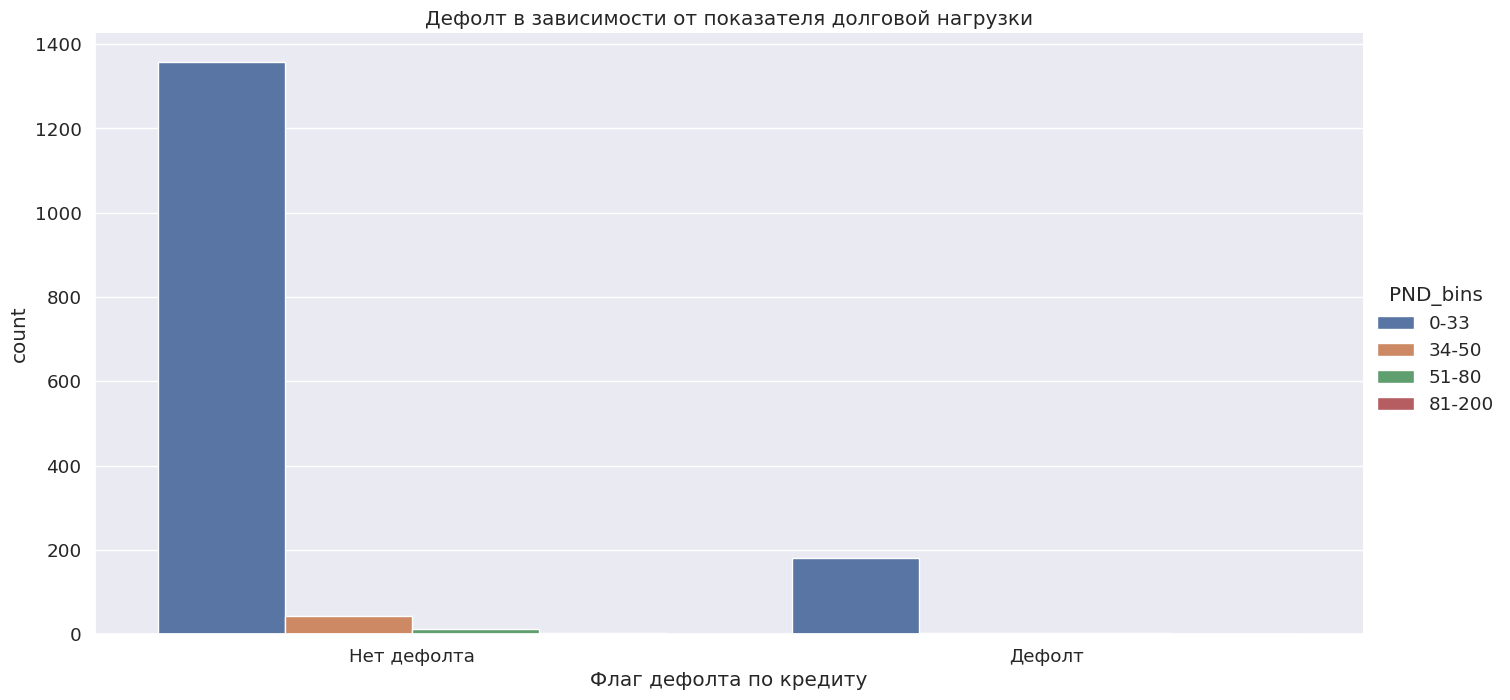

In [ ]:
sns.set (font_scale= 1.2 )
sns.catplot(x='Флаг дефолта по кредиту', data=df_1, kind='count', hue='PND_bins', height= 7 , aspect= 2).set(title='Дефолт в зависимости от показателя долговой нагрузки');

##### Скоринг клиента


[источник_1](https://ce.pnzgu.ru/files/ce.pnzgu.ru/ump_ocenka_kreditosposobnosti_zaemschika_kommercheskogo_banka_1_.pdf)

[источник_2](https://studfile.net/preview/3994358/page:36/)

In [ ]:
temp=df_1.copy()

In [ ]:
df_1['Age_bin'].unique()

array(['26-45', '0-25', '46-55', '56-100'], dtype=object)

In [ ]:
df_1['Пол клиента'].unique()

array(['Мужской', 'Женский'], dtype=object)

In [ ]:
df_1['Образование клиента'].unique()

array(['Среднее специальное', 'Высшее', 'Неоконченное высшее', 'Среднее',
       'Неоконченное среднее',
       'Несколько высших или более высокая ступень образования'],
      dtype=object)

In [ ]:
df_1['Регион выдачи кредита'].unique()

array(['Другие регионы', 'Москва или МО', 'Санкт-Петербург или ЛО'],
      dtype=object)

In [ ]:
df_1['Income_bin'].unique()

array(['20100-50000', '10100-20000', '50100-100000', '5000-10000'],
      dtype=object)

In [ ]:
df_1['Семейное положение'].unique()

array(['Другое', 'Никогда не был(а) женат/замужем', 'Женат/замужем'],
      dtype=object)

In [ ]:
df_1['Наличие детей у клиента'].unique()

array(['Детей нет', 'Дети есть'], dtype=object)

In [ ]:
temp = temp.replace({'Age_bin':{'26-45':10, '0-25':5, '46-55':0, '56-100':-10 }, 'Пол клиента':{'Мужской':10, 'Женский':20},
                     'Образование клиента':{'Среднее специальное':0, 'Высшее':10, 'Неоконченное высшее':0, 'Среднее':-10, 'Неоконченное среднее':-10, 'Несколько высших или более высокая ступень образования':20 },
                     'Регион выдачи кредита':{'Другие регионы':5, 'Москва или МО':15, 'Санкт-Петербург или ЛО':10},
                     'Income_bin':{'20100-50000':40, '10100-20000':30, '50100-100000':50, '5000-10000':20},
                     'Семейное положение':{'Другое':5, 'Никогда не был(а) женат/замужем':5, 'Женат/замужем':15},
                     'Наличие детей у клиента':{'Детей нет':5, 'Дети есть':10}
                     })


In [ ]:
temp.head()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту,Age_bin,Income_bin,K_min,Показатель долговой нагрузки,PND_bins
0,1,7000,12,39,10,0,Мобильные телефоны,5,5,21000,5,МТС,Не клиент банка,Нет дефолта,10,40,0.30,4.0,0-33
1,1,19000,6,20,10,0,Бытовая техника,10,5,17000,5,Теле2,Клиент банка,Нет дефолта,5,30,0.35,28.7,0-33
2,1,29000,12,23,20,0,Бытовая техника,5,5,31000,5,Билайн,Не клиент банка,Нет дефолта,5,40,0.30,11.1,0-33
3,1,10000,12,30,10,0,Мобильные телефоны,10,5,31000,5,Теле2,Клиент банка,Нет дефолта,10,40,0.35,4.1,0-33
4,1,14500,12,25,20,10,Мобильные телефоны,5,5,26000,15,МТС,Клиент банка,Нет дефолта,5,40,0.35,7.1,0-33


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Месяц выдачи кредита          1603 non-null   int64   
 1   Сумма кредита                 1603 non-null   int64   
 2   Срок кредита                  1603 non-null   int64   
 3   Возраст клиента               1603 non-null   int64   
 4   Пол клиента                   1603 non-null   int64   
 5   Образование клиента           1603 non-null   int64   
 6   Тип товара                    1603 non-null   object  
 7   Наличие детей у клиента       1603 non-null   int64   
 8   Регион выдачи кредита         1603 non-null   int64   
 9   Доход клиента                 1603 non-null   int64   
 10  Семейное положение            1603 non-null   int64   
 11  Оператор связи                1603 non-null   object  
 12  Является ли клиентом банка    1603 non-null   ob

In [ ]:
temp[['Age_bin', 'Income_bin']] = temp[['Age_bin', 'Income_bin']].astype('int')

In [ ]:
df_1['Скоринг клиента'] = temp['Age_bin'] + temp['Пол клиента'] + temp['Образование клиента'] + temp['Регион выдачи кредита'] + temp['Income_bin'] + temp['Семейное положение'] + temp['Наличие детей у клиента']

In [ ]:
print('Уникальные значения по скорингу клиента')
df_1_=df_1['Скоринг клиента'].unique()
df_1_.sort()
print(df_1_)
print('---------------------------')
print('Распределение уникальных значений по скорингу клиента')
print(df_1['Скоринг клиента'].value_counts())

Уникальные значения по скорингу клиента
[ 25  35  40  45  50  55  60  65  70  75  80  85  90  95 100 105 110 115
 120 125]
---------------------------
Распределение уникальных значений по скорингу клиента
80     260
90     247
85     170
70     158
100    156
75     138
95     107
65      73
60      68
110     50
105     48
55      44
50      24
45      22
115     16
120      9
35       6
40       3
125      3
25       1
Name: Скоринг клиента, dtype: int64


In [ ]:
df_1.isna().sum()

Месяц выдачи кредита            0
Сумма кредита                   0
Срок кредита                    0
Возраст клиента                 0
Пол клиента                     0
Образование клиента             0
Тип товара                      0
Наличие детей у клиента         0
Регион выдачи кредита           0
Доход клиента                   0
Семейное положение              0
Оператор связи                  0
Является ли клиентом банка      0
Флаг дефолта по кредиту         0
Age_bin                         0
Income_bin                      0
K_min                           0
Показатель долговой нагрузки    0
PND_bins                        0
Скоринг клиента                 0
dtype: int64

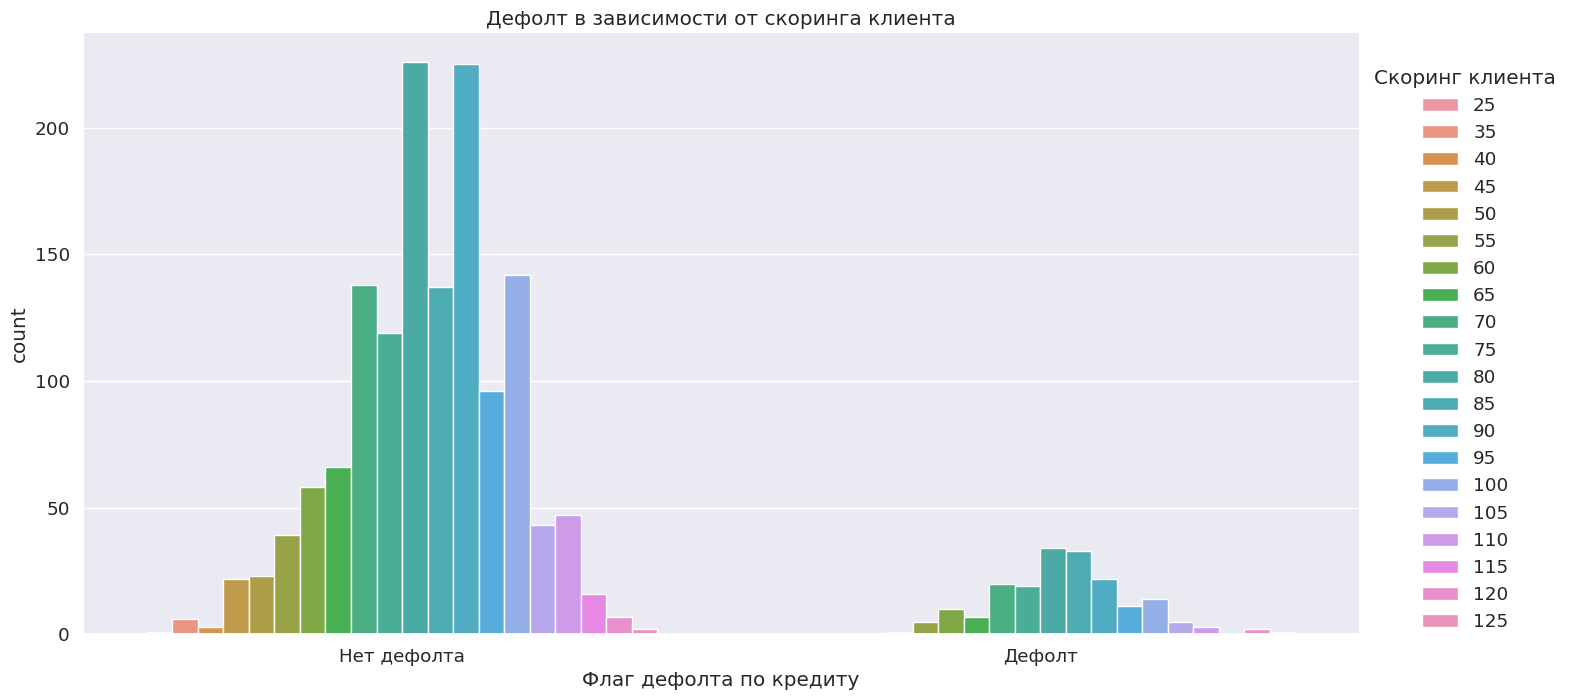

In [ ]:
sns.set (font_scale= 1.2 )
sns.catplot(x='Флаг дефолта по кредиту', data=df_1, kind='count', hue='Скоринг клиента', height= 7 , aspect= 2).set(title='Дефолт в зависимости от скоринга клиента');

In [ ]:
df_1.to_csv (r'df_2.csv', index = None, header=True)

#### Проверка метрики

In [ ]:
df_2=pd.read_csv('df_2.csv')

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Месяц выдачи кредита          1603 non-null   int64  
 1   Сумма кредита                 1603 non-null   int64  
 2   Срок кредита                  1603 non-null   int64  
 3   Возраст клиента               1603 non-null   int64  
 4   Пол клиента                   1603 non-null   object 
 5   Образование клиента           1603 non-null   object 
 6   Тип товара                    1603 non-null   object 
 7   Наличие детей у клиента       1603 non-null   object 
 8   Регион выдачи кредита         1603 non-null   object 
 9   Доход клиента                 1603 non-null   int64  
 10  Семейное положение            1603 non-null   object 
 11  Оператор связи                1603 non-null   object 
 12  Является ли клиентом банка    1603 non-null   object 
 13  Фла

In [ ]:
df_3=df_2[['Сумма кредита', 'Срок кредита', 'Является ли клиентом банка', 'Флаг дефолта по кредиту', 'Показатель долговой нагрузки', 'Скоринг клиента']]

In [ ]:
categorials = list(df_3.dtypes[df_3.dtypes == object].index)
dummy_data = pd.get_dummies(df_3[categorials], columns=categorials)
dummy_data=dummy_data.drop(['Флаг дефолта по кредиту_Дефолт', 'Флаг дефолта по кредиту_Нет дефолта'], axis=1)
integer = [f for f in df_3 if f not in (categorials)]
df_3_ = pd.concat([df_3[integer], dummy_data], axis=1)

In [ ]:
X = df_3_
X.shape

(1603, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_3['Флаг дефолта по кредиту'])
y = pd.Series (le.transform(df_3['Флаг дефолта по кредиту']))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((961, 6), (642, 6))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)
X_test.shape, X_val.shape

((321, 6), (321, 6))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
model_1 = LogisticRegression(random_state=42, class_weight='balanced')
model_1.fit(X_train, y_train)
pred_model_1=model_1.predict(X_val)
f1_model_1=f1_score(y_val, pred_model_1, average='macro')
f1_model_1

0.5146612379013537

##### отбор обновленных признаков с помощью логистической регрессии

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [ ]:
categorials = list(df_2.dtypes[df_2.dtypes == object].index)
dummy_data = pd.get_dummies(df_2[categorials], columns=categorials)
dummy_data=dummy_data.drop(['Флаг дефолта по кредиту_Дефолт', 'Флаг дефолта по кредиту_Нет дефолта'], axis=1)
integer = [f for f in df_2 if f not in (categorials)]
df_2_ = pd.concat([df_2[integer], dummy_data], axis=1)

In [ ]:
X = df_2_
X.shape

(1603, 65)

In [ ]:
L_SVC = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
selector = SelectFromModel(L_SVC, prefit=True)
X_3 = selector.transform(X)
X_3.shape[1]

22

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_3,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((961, 22), (642, 22))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [ ]:
X_test.shape, X_val.shape

((321, 22), (321, 22))

In [ ]:
FS_3 = LogisticRegression(random_state=42, class_weight='balanced')
FS_3.fit(X_train, y_train)
pred_FS_3=FS_3.predict(X_val)
f1_FS_3=f1_score(y_val, pred_FS_3, average='macro')
f1_FS_3

0.583765560165975

##### Оптимизация гиперпараметров модели

In [ ]:
FS_3.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hyperparams = {
    'class_weight':[None, 'balanced'],
    'penalty':[None, 'l2', 'l1', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 150, 200],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

grid = GridSearchCV(FS_3, hyperparams, cv=4, n_jobs=-1).fit(X_train, y_train)
print('Оптимальные параметры для grid:')
print(grid.best_score_, grid.best_params_)

Оптимальные параметры для grid:
0.8844917012448132 {'class_weight': None, 'max_iter': 50, 'multi_class': 'auto', 'penalty': None, 'solver': 'lbfgs'}


In [ ]:
model_grid = LogisticRegression(random_state=42, class_weight=None, max_iter = 50, multi_class = 'auto', penalty = None, solver = 'lbfgs')
model_grid.fit(X_train, y_train)
pred_model_grid=model_grid.predict(X_val)

In [ ]:
print(classification_report(y_val, pred_model_grid, target_names=['Дефолт', 'Нет дефолта']))

              precision    recall  f1-score   support

      Дефолт       1.00      0.03      0.05        38
 Нет дефолта       0.88      1.00      0.94       283

    accuracy                           0.88       321
   macro avg       0.94      0.51      0.49       321
weighted avg       0.90      0.88      0.83       321



In [ ]:
f1_model_grid=f1_score(y_val, pred_model_grid, average='macro')
f1_model_grid

0.4949610919760174

#### Сводка по моделям

In [ ]:
data = {'f1 macro avg':['0.48', '0.54', '0.59', '0.51', '0.58', '0.49']}
df_res = pd.DataFrame(data, index =['Baseline', 'Baseline + выбросы_OCSVM', 'Baseline + выбросы_OCSVM + Feature Selection', 'Преобразование признаков', 'Преобразование признаков + Feature Selection', 'Преобразование признаков + Feature Selection + оптимизация'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,f1 macro avg
Baseline,0.48
Baseline + выбросы_OCSVM,0.54
Baseline + выбросы_OCSVM + Feature Selection,0.59
Преобразование признаков,0.51
Преобразование признаков + Feature Selection,0.58
Преобразование признаков + Feature Selection + оптимизация,0.49


## МОДЕЛИ ПО СРОКУ КРЕДИТОВАНИЯ

In [ ]:
df_2=pd.read_csv('df_2.csv')

In [ ]:
df_count2 = df_2.groupby(['Срок кредита', 'Месяц выдачи кредита', 'Флаг дефолта по кредиту']).size().reset_index(name='Count').sort_values(by='Срок кредита', ascending=True)
df_count2

,Срок кредита,Месяц выдачи кредита,Флаг дефолта по кредиту,Count
0,3,1,Нет дефолта,7
14,3,12,Нет дефолта,4
13,3,12,Дефолт,1
12,3,11,Нет дефолта,4
11,3,10,Нет дефолта,8
...,...,...,...,...
230,36,8,Нет дефолта,2
231,36,9,Нет дефолта,2
232,36,10,Нет дефолта,3
233,36,11,Нет дефолта,1


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Месяц выдачи кредита          1603 non-null   int64  
 1   Сумма кредита                 1603 non-null   int64  
 2   Срок кредита                  1603 non-null   int64  
 3   Возраст клиента               1603 non-null   int64  
 4   Пол клиента                   1603 non-null   object 
 5   Образование клиента           1603 non-null   object 
 6   Тип товара                    1603 non-null   object 
 7   Наличие детей у клиента       1603 non-null   object 
 8   Регион выдачи кредита         1603 non-null   object 
 9   Доход клиента                 1603 non-null   int64  
 10  Семейное положение            1603 non-null   object 
 11  Оператор связи                1603 non-null   object 
 12  Является ли клиентом банка    1603 non-null   object 
 13  Фла

In [ ]:
df_2['Срок кредита'].unique()

array([12,  6, 24,  3, 10, 18, 11,  9,  8,  4, 15, 14,  5, 36, 16, 17, 20,
        7, 13, 30, 27, 34])

In [ ]:
df_short = df_2.loc[df_2['Срок кредита'] < 13]

In [ ]:
df_short['Срок кредита'].unique()

array([12,  6,  3, 10, 11,  9,  8,  4,  5,  7])

In [ ]:
df_long = df_2.loc[df_2['Срок кредита'] > 12]

In [ ]:
df_long['Срок кредита'].unique()

array([24, 18, 15, 14, 36, 16, 17, 20, 13, 30, 27, 34])

In [ ]:
print(df_short.shape)
print('---------------------------')
print(df_short['Флаг дефолта по кредиту'].value_counts())

(1292, 20)
---------------------------
Нет дефолта    1157
Дефолт          135
Name: Флаг дефолта по кредиту, dtype: int64


In [ ]:
print(df_long.shape)
print('---------------------------')
print(df_long['Флаг дефолта по кредиту'].value_counts())

(311, 20)
---------------------------
Нет дефолта    259
Дефолт          52
Name: Флаг дефолта по кредиту, dtype: int64


### проверка метрики для модели коротких кредитов

In [ ]:
df_short = df_short[['Сумма кредита', 'Срок кредита', 'Является ли клиентом банка', 'Флаг дефолта по кредиту', 'Показатель долговой нагрузки', 'Скоринг клиента']]

In [ ]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 0 to 1601
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Сумма кредита                 1292 non-null   int64  
 1   Срок кредита                  1292 non-null   int64  
 2   Является ли клиентом банка    1292 non-null   object 
 3   Флаг дефолта по кредиту       1292 non-null   object 
 4   Показатель долговой нагрузки  1292 non-null   float64
 5   Скоринг клиента               1292 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 70.7+ KB


In [ ]:
categorials = list(df_short.dtypes[df_short.dtypes == object].index)
dummy_data = pd.get_dummies(df_short[categorials], columns=categorials)
dummy_data=dummy_data.drop(['Флаг дефолта по кредиту_Дефолт', 'Флаг дефолта по кредиту_Нет дефолта'], axis=1)
integer = [f for f in df_short if f not in (categorials)]
df_short_ = pd.concat([df_short[integer], dummy_data], axis=1)

In [ ]:
X = df_short_
X.shape

(1292, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_short['Флаг дефолта по кредиту'])
y = pd.Series (le.transform(df_short['Флаг дефолта по кредиту']))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((775, 6), (517, 6))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)
X_test.shape, X_val.shape

((258, 6), (259, 6))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
model_1 = LogisticRegression(random_state=42, class_weight='balanced')
model_1.fit(X_train, y_train)
pred_model_1=model_1.predict(X_val)
f1_model_1=f1_score(y_val, pred_model_1, average='macro')
f1_model_1

0.45669763260413543

### проверка метрики для модели долгих кредитов

In [ ]:
df_long = df_long[['Сумма кредита', 'Срок кредита', 'Является ли клиентом банка', 'Флаг дефолта по кредиту', 'Показатель долговой нагрузки', 'Скоринг клиента']]

In [ ]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 5 to 1602
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Сумма кредита                 311 non-null    int64  
 1   Срок кредита                  311 non-null    int64  
 2   Является ли клиентом банка    311 non-null    object 
 3   Флаг дефолта по кредиту       311 non-null    object 
 4   Показатель долговой нагрузки  311 non-null    float64
 5   Скоринг клиента               311 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 17.0+ KB


In [ ]:
categorials = list(df_long.dtypes[df_long.dtypes == object].index)
dummy_data = pd.get_dummies(df_long[categorials], columns=categorials)
dummy_data=dummy_data.drop(['Флаг дефолта по кредиту_Дефолт', 'Флаг дефолта по кредиту_Нет дефолта'], axis=1)
integer = [f for f in df_long if f not in (categorials)]
df_long_ = pd.concat([df_long[integer], dummy_data], axis=1)

In [ ]:
X = df_long_
X.shape

(311, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_long['Флаг дефолта по кредиту'])
y = pd.Series (le.transform(df_long['Флаг дефолта по кредиту']))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((186, 6), (125, 6))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)
X_test.shape, X_val.shape

((62, 6), (63, 6))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
model_1 = LogisticRegression(random_state=42, class_weight='balanced')
model_1.fit(X_train, y_train)
pred_model_1=model_1.predict(X_val)
f1_model_1=f1_score(y_val, pred_model_1, average='macro')
f1_model_1

0.3950617283950618

## НОВАЯ РАЗМЕТКА ДАННЫХ

Предполагаю что проблема низкого качества классификации состоит в том, что в исходном датасете произошло слияние двух баз -(завершенные и текущие кредиты). В результате клиенты, подпадающие под дефолтные критерии имеют метку "нет дефолта".

In [ ]:
df_2=pd.read_csv('df_2.csv')

In [ ]:
df_count2 = df_2.groupby(['Месяц выдачи кредита', 'Флаг дефолта по кредиту', 'Срок кредита']).size().reset_index(name='Count').sort_values(by='Флаг дефолта по кредиту', ascending=True)
df_count2

,Месяц выдачи кредита,Флаг дефолта по кредиту,Срок кредита,Count
0,1,Дефолт,6,3
193,11,Дефолт,9,1
194,11,Дефолт,10,3
195,11,Дефолт,12,8
196,11,Дефолт,16,2
...,...,...,...,...
99,6,Нет дефолта,11,2
100,6,Нет дефолта,12,31
101,6,Нет дефолта,13,1
74,5,Нет дефолта,3,3


Для решения этой проблемы можно сделать новую разметку данных путём кластеризации. При это принимаем за истину клиентов с меткой "дефолт".


In [ ]:
df_2=pd.read_csv('df_2.csv')

In [ ]:
df_new=df_2.copy()

In [ ]:
df_new = df_new[['Сумма кредита', 'Срок кредита', 'Является ли клиентом банка', 'Флаг дефолта по кредиту', 'Показатель долговой нагрузки', 'Скоринг клиента']]

In [ ]:
df_new_km = df_new.drop(['Флаг дефолта по кредиту'], axis=1)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2,
                  init='k-means++',
                  n_init='auto',
                  random_state=42)

In [ ]:
categorials = list(df_new_km.dtypes[df_new_km.dtypes == object].index)
dummy_data = pd.get_dummies(df_new_km[categorials], columns=categorials)
integer = [f for f in df_new_km if f not in (categorials)]
df_new_km = pd.concat([df_new_km[integer], dummy_data], axis=1)

In [ ]:
X = df_new_km
X.shape

(1603, 6)

In [ ]:
model.fit(X)

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [ ]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
df_new_km['Флаг_new'] = model.predict(X)

In [ ]:
df_new_km = df_new_km.replace({'Флаг_new':{1:'Дефолт', 0:'Нет дефолта'}})

In [ ]:
df_new_km.isna().sum()

Сумма кредита                                 0
Срок кредита                                  0
Показатель долговой нагрузки                  0
Скоринг клиента                               0
Является ли клиентом банка_Клиент банка       0
Является ли клиентом банка_Не клиент банка    0
Флаг_new                                      0
dtype: int64

In [ ]:
df_new_km['Флаг_new'].value_counts() # смотрим новое распределение

Нет дефолта    1354
Дефолт          249
Name: Флаг_new, dtype: int64

In [ ]:
df_my_concat = pd.concat([df_new, df_new_km], axis=1)
df_my_concat

,Сумма кредита,Срок кредита,Является ли клиентом банка,Флаг дефолта по кредиту,Показатель долговой нагрузки,Скоринг клиента,Сумма кредита,Срок кредита,Показатель долговой нагрузки,Скоринг клиента,Является ли клиентом банка_Клиент банка,Является ли клиентом банка_Не клиент банка,Флаг_new
0,7000,12,Не клиент банка,Нет дефолта,4.0,75,7000,12,4.0,75,0,1,Нет дефолта
1,19000,6,Клиент банка,Нет дефолта,28.7,65,19000,6,28.7,65,1,0,Нет дефолта
2,29000,12,Не клиент банка,Нет дефолта,11.1,80,29000,12,11.1,80,0,1,Нет дефолта
3,10000,12,Клиент банка,Нет дефолта,4.1,80,10000,12,4.1,80,1,0,Нет дефолта
4,14500,12,Клиент банка,Нет дефолта,7.1,100,14500,12,7.1,100,1,0,Нет дефолта
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,46500,24,Клиент банка,Нет дефолта,5.4,95,46500,24,5.4,95,1,0,Дефолт
1599,18500,6,Клиент банка,Нет дефолта,10.3,90,18500,6,10.3,90,1,0,Нет дефолта
1600,6500,6,Клиент банка,Нет дефолта,8.6,60,6500,6,8.6,60,1,0,Нет дефолта
1601,30500,10,Клиент банка,Дефолт,10.6,80,30500,10,10.6,80,1,0,Нет дефолта


In [ ]:
df_my_concat['Сранение'] = df_my_concat['Флаг дефолта по кредиту'] == df_my_concat['Флаг_new']

In [ ]:
df_my_concat['Сранение'].value_counts()

True     1223
False     380
Name: Сранение, dtype: int64

In [ ]:
df_count = df_my_concat.groupby(['Сранение', 'Флаг дефолта по кредиту', 'Флаг_new']).size().reset_index(name='Count').sort_values(by='Сранение', ascending=True)
df_count

,Сранение,Флаг дефолта по кредиту,Флаг_new,Count
0,False,Дефолт,Нет дефолта,159
1,False,Нет дефолта,Дефолт,221
2,True,Дефолт,Дефолт,28
3,True,Нет дефолта,Нет дефолта,1195


In [ ]:
df_my_concat.loc[(df_my_concat['Флаг дефолта по кредиту'] == 'Дефолт'), 'Флаг_new'] = 'Дефолт'

In [ ]:
df_my_concat['Сранение_'] = df_my_concat['Флаг дефолта по кредиту'] == df_my_concat['Флаг_new']

In [ ]:
df_my_concat['Сранение_'].value_counts() # смотрим распределение

True     1382
False     221
Name: Сранение_, dtype: int64

In [ ]:
df_count = df_my_concat.groupby(['Сранение_', 'Флаг дефолта по кредиту', 'Флаг_new']).size().reset_index(name='Count').sort_values(by='Сранение_', ascending=True)
df_count

,Сранение_,Флаг дефолта по кредиту,Флаг_new,Count
0,False,Нет дефолта,Дефолт,221
1,True,Дефолт,Дефолт,187
2,True,Нет дефолта,Нет дефолта,1195


In [ ]:
df_my_concat['Флаг_new'].value_counts() # смотрим распределение

Нет дефолта    1195
Дефолт          408
Name: Флаг_new, dtype: int64

### проверка метрики

In [ ]:
df_km = df_new.drop(['Флаг дефолта по кредиту'], axis=1)

In [ ]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Сумма кредита                 1603 non-null   int64  
 1   Срок кредита                  1603 non-null   int64  
 2   Является ли клиентом банка    1603 non-null   object 
 3   Показатель долговой нагрузки  1603 non-null   float64
 4   Скоринг клиента               1603 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 62.7+ KB


In [ ]:
categorials = list(df_km.dtypes[df_km.dtypes == object].index)
dummy_data = pd.get_dummies(df_km[categorials], columns=categorials)
integer = [f for f in df_km if f not in (categorials)]
df_km_ = pd.concat([df_km[integer], dummy_data], axis=1)

In [ ]:
X = df_km_
X.shape

(1603, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_my_concat['Флаг_new'])
y = pd.Series (le.transform(df_my_concat['Флаг_new']))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    train_size=0.6,
                                                    random_state=42)
X_train.shape, X_test.shape

((961, 6), (642, 6))

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    train_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)
X_test.shape, X_val.shape

((321, 6), (321, 6))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
model_1 = LogisticRegression(random_state=42, class_weight='balanced')
model_1.fit(X_train, y_train)
pred_model_1=model_1.predict(X_val)
f1_model_1=f1_score(y_val, pred_model_1, average='macro')
f1_model_1

0.7543116644555565

### Оптимизация гиперпараметров модели

In [ ]:
model_1.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hyperparams = {
    'class_weight':[None, 'balanced'],
    'penalty':[None, 'l2', 'l1', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 150, 200],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

grid = GridSearchCV(model_1, hyperparams, cv=4, n_jobs=-1).fit(X_train, y_train)
print('Оптимальные параметры для grid:')
print(grid.best_score_, grid.best_params_)

Оптимальные параметры для grid:
0.8844744121715076 {'class_weight': None, 'max_iter': 100, 'multi_class': 'auto', 'penalty': None, 'solver': 'newton-cg'}


In [ ]:
model_grid = LogisticRegression(random_state=42, class_weight=None, max_iter = 100,
                                multi_class = 'auto', penalty = None, solver = 'newton-cg')
model_grid.fit(X_train, y_train)
pred_model_grid=model_grid.predict(X_val)

In [ ]:
print(classification_report(y_val, pred_model_grid, target_names=['Дефолт', 'Нет дефолта']))

              precision    recall  f1-score   support

      Дефолт       0.90      0.58      0.70        78
 Нет дефолта       0.88      0.98      0.93       243

    accuracy                           0.88       321
   macro avg       0.89      0.78      0.81       321
weighted avg       0.88      0.88      0.87       321



In [ ]:
f1_model_grid=f1_score(y_val, pred_model_grid, average='macro')
f1_model_grid

0.8145975194552528

## ВЫБОР ИТОГОВОЙ МОДЕЛИ

In [ ]:
data = {'f1 macro avg':['0.48', '0.54', '0.59', '0.51', '0.58', '0.49', '0.46', '0.40', '0.75', '0.81']}
df_res = pd.DataFrame(data, index =['Baseline', 'Baseline + выбросы_OCSVM', 'Baseline + выбросы_OCSVM + Feature Selection',
                                    'Преобразование признаков', 'Преобразование признаков + Feature Selection', 'Преобразование признаков + Feature Selection + оптимизация',
                                    'Преобразование признаков + короткий срок', 'Преобразование признаков + длинный срок',
                                    'Переразметка на преобразованных признаках', 'Переразметка на преобразованных признаках + оптимизация'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,f1 macro avg
Baseline,0.48
Baseline + выбросы_OCSVM,0.54
Baseline + выбросы_OCSVM + Feature Selection,0.59
Преобразование признаков,0.51
Преобразование признаков + Feature Selection,0.58
Преобразование признаков + Feature Selection + оптимизация,0.49
Преобразование признаков + короткий срок,0.46
Преобразование признаков + длинный срок,0.40
Переразметка на преобразованных признаках,0.75
Переразметка на преобразованных признаках + оптимизация,0.81


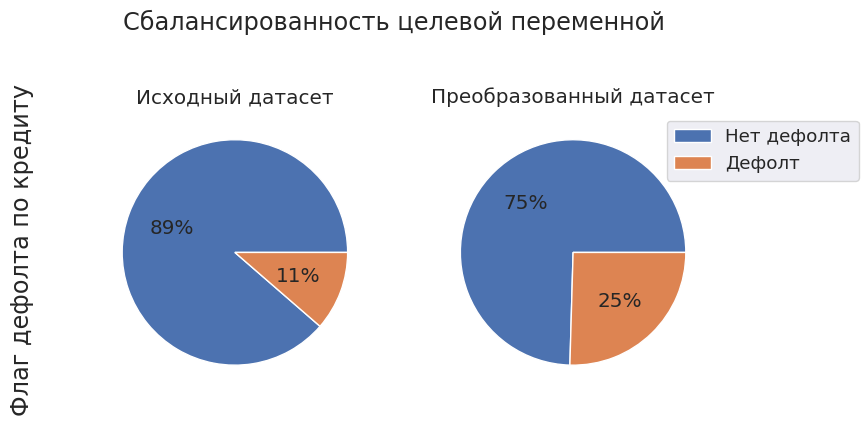

In [ ]:
fig = plt.figure(figsize = (8,5))

fig.suptitle('Сбалансированность целевой переменной')
fig.supylabel('Флаг дефолта по кредиту')

ax1 = fig.add_subplot(122, title = 'Преобразованный датасет')
df_my_concat['Флаг_new'].value_counts().plot(kind='pie', autopct='%1.0f%%', labeldistance=None)
ax1.axes.yaxis.set_visible(False)

ax2 = fig.add_subplot(121, title = 'Исходный датасет')
df['Флаг дефолта по кредиту'].value_counts().plot(kind='pie', autopct='%1.0f%%', labeldistance=None)
ax2.axes.yaxis.set_visible(False)

plt.legend(bbox_to_anchor=(2, 1), loc='upper left');

Параметры итоговой модели:
- уменьшили дисбаланс классов (с 11% до 25%) путём переразметки целевого класса;
- уменьшили количество признаков (с 14 до 6) путем преобразования признаков;
- увеличили метрику f1 macro avg (с 0.59 до 0.81).

## Проверка на тестовой выборке

In [ ]:
model_grid = LogisticRegression(random_state=42, class_weight=None, max_iter = 100, multi_class = 'auto', penalty = None, solver = 'newton-cg')
model_grid.fit(X_train, y_train)
pred_model_grid=model_grid.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_model_grid, target_names=['Дефолт', 'Нет дефолта']))

              precision    recall  f1-score   support

      Дефолт       0.80      0.55      0.65        78
 Нет дефолта       0.87      0.95      0.91       243

    accuracy                           0.86       321
   macro avg       0.83      0.75      0.78       321
weighted avg       0.85      0.86      0.85       321



In [ ]:
f1_model_grid=f1_score(y_test, pred_model_grid, average='macro')
f1_model_grid

0.7806595365418895

# Оценка качества модели (не ухудшается ли качество модели по временем? стабильны ли переменные?)

### Выбор порога

Порог классификатора контролирует соотношение между количеством False positive и False negative. Если мы задаем слишком высокий порог классификатора, то он редко предсказывает 1 (в нашем случае это "Нет дефолта"), но часто 0 (в нашем случае - "Дефолт"), таким образом, увеличивается количество False negative и уменьшается количество False positive. Если же порог низкий - мы часто предсказываем 1("Нет дефолта", а 0 ("Дефолт") реже, значит увеличивается количество False positive и уменьшается False negative.

Что это значит в нашей задаче кредитного скоринга? Если порог низкий, то мы реже считаем клиентов подозрительными и чаще выдаем клиентам кредит. В этом случае банк может потерять много денег из-за невозвратов. Если же порог высокий, то мы чаще считаем клиентов подозрительными и выдаем мало кредитов. Очевидно, это тоже плохо, так как мы часто не выдаем кредиты честным клиентам, что отражается на прибыли банка.

In [ ]:
y_pred = model_grid.predict(X_test) # порог=0.5

In [ ]:
# порог=0.7
y_pred_threshold_7 = (model_grid.predict_proba(X_test)[:, 1] >= 0.7).astype(int)

In [ ]:
# порог=0.3
y_pred_threshold_3 = (model_grid.predict_proba(X_test)[:, 1] >= 0.3).astype(int)

### ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
predictions = model_grid.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])
fpr_3, tpr_3, thresh_3 = roc_curve(y_test, y_pred_threshold_3)
fpr_7, tpr_7, thresh_7 = roc_curve(y_test, y_pred_threshold_7)

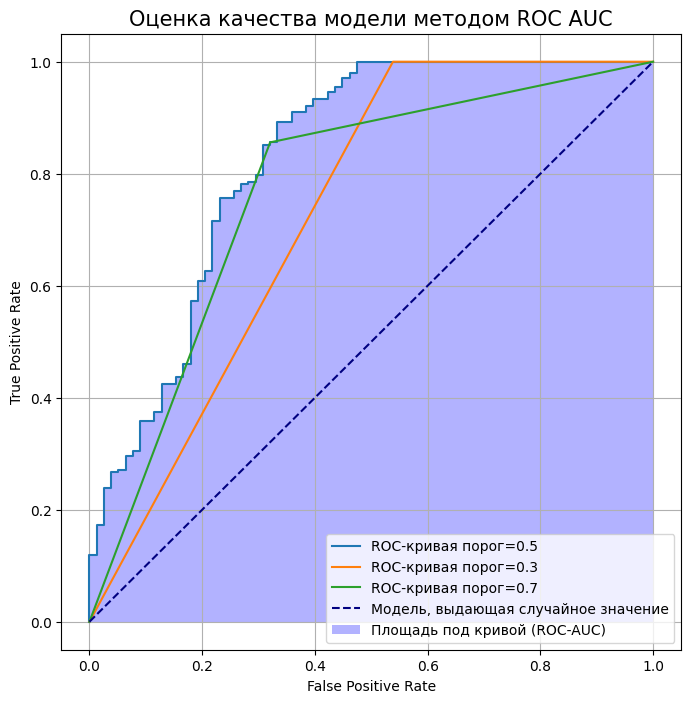

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label = 'ROC-кривая порог=0.5')
plt.plot(fpr_3, tpr_3, label = 'ROC-кривая порог=0.3')
plt.plot(fpr_7, tpr_7, label = 'ROC-кривая порог=0.7')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = 'Модель, выдающая случайное значение')
plt.fill_between(fpr, tpr, facecolor='blue', alpha=0.3, label='Площадь под кривой (ROC-AUC)')
plt.title('Оценка качества модели методом ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 10})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 10})
plt.legend() #loc = 0 )
plt.grid()
plt.show()

In [ ]:
roc_auc_score(y_test, predictions[:, 1]) # порог=0,5 - качество модели получилось хорошее

0.8286377545636805

In [ ]:
roc_auc_score(y_test, y_pred_threshold_3) # порог=0,3 - качество модели получилось удовлетворительное

0.7307692307692308

In [ ]:
roc_auc_score(y_test, y_pred_threshold_7) # порог=0,7 - качество модели получилось удовлетворительное

0.76772712883824

Типичная шкала для **ROC-AUC** (часто все зависит от задачи):
* $0.90$ - $1.00$ отлично;
* $0.80$ - $0.90$ хорошо;
* $0.70$ - $0.80$ удовлетворительно;
* $0.60$ - $0.70$ плохо;
* $0.50$ - $0.60$ очень плохо;
* $0.00$ - $0.50$ классификатор перепутал метки.

### матрица путаницы

In [ ]:
from sklearn.metrics import confusion_matrix

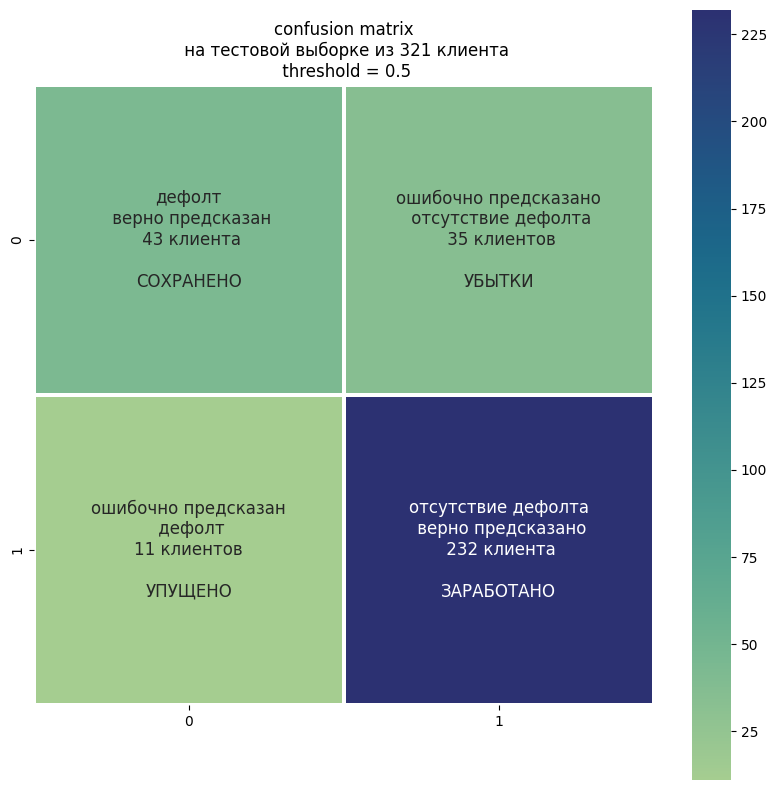

In [ ]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, pred_model_grid)
labels =  np.array([['дефолт\n верно предсказан\n 43 клиента\n \nСОХРАНЕНО', 'ошибочно предсказано\n отсутствие дефолта\n 35 клиентов\n \nУБЫТКИ'],
                 ['ошибочно предсказан\n дефолт\n11 клиентов\n \nУПУЩЕНО', 'отсутствие дефолта\n верно предсказано\n 232 клиента\n \nЗАРАБОТАНО']])

sns.heatmap(cm, annot=labels, fmt="", cmap="crest", square=True, linewidth=1.5, annot_kws={"fontsize":12})

plt.title('confusion matrix\n на тестовой выборке из 321 клиента\n threshold = 0.5');

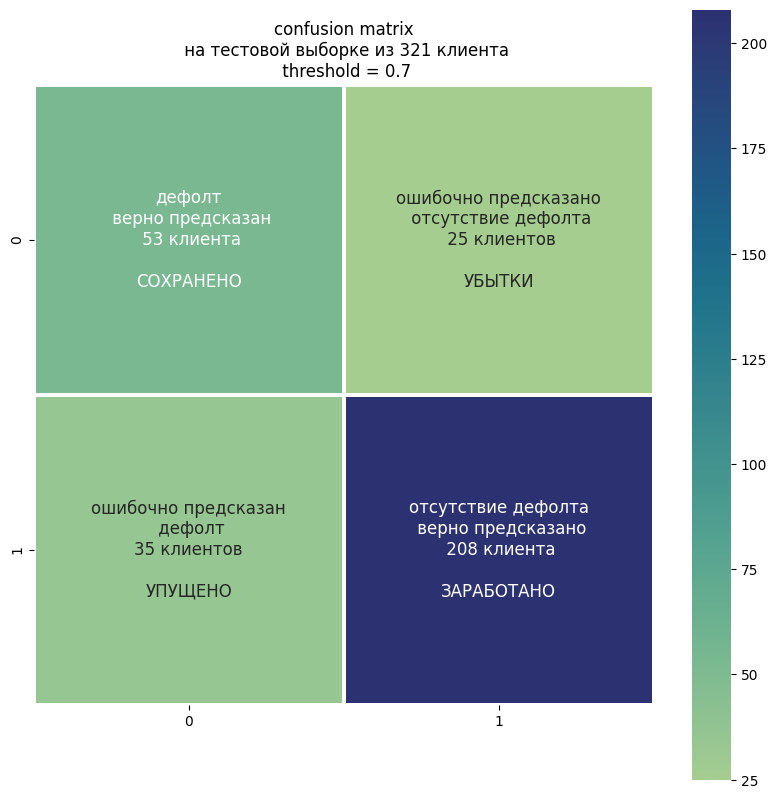

In [ ]:
plt.figure(figsize=(10, 10))
cm_7 = confusion_matrix(y_test, y_pred_threshold_7)
labels =  np.array([['дефолт\n верно предсказан\n 53 клиента\n \nСОХРАНЕНО', 'ошибочно предсказано\n отсутствие дефолта\n 25 клиентов\n \nУБЫТКИ'],
                 ['ошибочно предсказан\n дефолт\n35 клиентов\n \nУПУЩЕНО', 'отсутствие дефолта\n верно предсказано\n 208 клиента\n \nЗАРАБОТАНО']])

sns.heatmap(cm_7, annot=labels, fmt="", cmap="crest", square=True, linewidth=1.5, annot_kws={"fontsize":12})

plt.title('confusion matrix\n на тестовой выборке из 321 клиента\n threshold = 0.7');

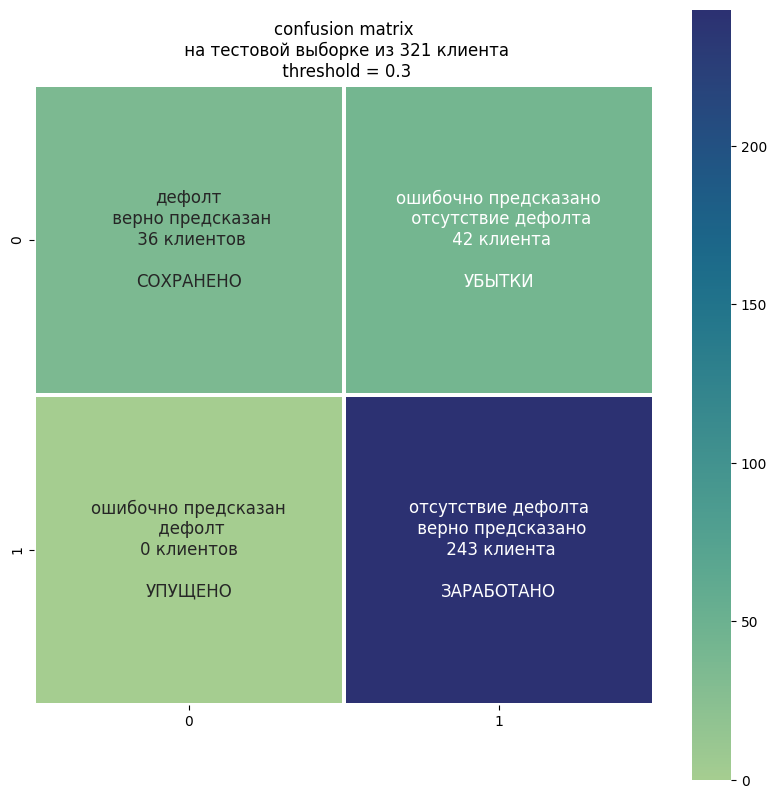

In [ ]:
plt.figure(figsize=(10, 10))
cm_3 = confusion_matrix(y_test, y_pred_threshold_3)
labels = np.array([['дефолт\n верно предсказан\n 36 клиентов\n \nСОХРАНЕНО', 'ошибочно предсказано\n отсутствие дефолта\n 42 клиента\n \nУБЫТКИ'],
                 ['ошибочно предсказан\n дефолт\n0 клиентов\n \nУПУЩЕНО', 'отсутствие дефолта\n верно предсказано\n 243 клиента\n \nЗАРАБОТАНО']])

sns.heatmap(cm_3, annot=labels, fmt="", cmap="crest", square=True, linewidth=1.5, annot_kws={"fontsize":12})

plt.title('confusion matrix\n на тестовой выборке из 321 клиента\n threshold = 0.3');

# Эффект от внедрения модели

### отсечка = 0,5

In [ ]:
# средняя сумма кредита
S_k_mean = round(df['Сумма кредита'].mean())
S_k_mean

29265

In [ ]:
# общая сумма кредита для тестовой выборки (из расчета среднего значения)

In [ ]:
S_k_o = S_k_mean * 321
S_k_o

9394065

In [ ]:
cm

array([[ 43,  35],
       [ 11, 232]])

In [ ]:
# сумма убытков
S_y = (cm[0][1])* S_k_mean
S_y

1024275

In [ ]:
# процент убытков
P_S_y = round((1-((S_k_o - S_y) / S_k_o))*100,1)
P_S_y

10.9

In [ ]:
# сумма упущенной прибыли
S_yp = (cm[1][0])* S_k_mean
S_yp

321915

In [ ]:
# процент убытков
P_S_yp = round((1-((S_k_o - S_yp) / S_k_o))*100,1)
P_S_yp

3.4

In [ ]:
# сумма заработали
S_z = (cm[1][1]) * S_k_mean
S_z

6789480

In [ ]:
# процент заработанной суммы
P_S_z = round((1-((S_k_o - S_z) / S_k_o))*100,1)
P_S_z

72.3

In [ ]:
# сумма сохранили
S_s = (cm[0][0]) * S_k_mean
S_s

1258395

In [ ]:
# процент сохраненной суммы
P_S_s = round((1-((S_k_o - S_s) / S_k_o))*100,1)
P_S_s

13.4

## отсечка = 0,3

In [ ]:
cm_3

array([[ 36,  42],
       [  0, 243]])

In [ ]:
# средняя сумма кредита
S_k_mean = round(df['Сумма кредита'].mean())
S_k_mean

29265

In [ ]:
# общая сумма кредита для тестовой выборки (из расчета среднего значения)

In [ ]:
S_k_o = S_k_mean * 321
S_k_o

9394065

In [ ]:
# сумма убытков
S_y = (cm_3[0][1])* S_k_mean
S_y

1229130

In [ ]:
# процент убытков
P_S_y = round((1-((S_k_o - S_y) / S_k_o))*100,1)
P_S_y

13.1

In [ ]:
# сумма упущенной прибыли
S_yp = (cm_3[1][0])* S_k_mean
S_yp

0

In [ ]:
# процент убытков
P_S_yp = round((1-((S_k_o - S_yp) / S_k_o))*100,1)
P_S_yp

0.0

In [ ]:
# сумма заработали
S_z = (cm_3[1][1]) * S_k_mean
S_z

7111395

In [ ]:
# процент заработанной суммы
P_S_z = round((1-((S_k_o - S_z) / S_k_o))*100,1)
P_S_z

75.7

In [ ]:
# сумма сохранили
S_s = (cm_3[0][0]) * S_k_mean
S_s

1053540

In [ ]:
# процент сохраненной суммы
P_S_s = round((1-((S_k_o - S_s) / S_k_o))*100,1)
P_S_s

11.2

## отсечка = 0,7

In [ ]:
cm_7

array([[ 53,  25],
       [ 35, 208]])

In [ ]:
# средняя сумма кредита
S_k_mean = round(df['Сумма кредита'].mean())
S_k_mean

29265

In [ ]:
# общая сумма кредита для тестовой выборки (из расчета среднего значения)

In [ ]:
S_k_o = S_k_mean * 321
S_k_o

9394065

In [ ]:
# сумма убытков
S_y = (cm_7[0][1])* S_k_mean
S_y

731625

In [ ]:
# процент убытков
P_S_y = round((1-((S_k_o - S_y) / S_k_o))*100,1)
P_S_y

7.8

In [ ]:
# сумма упущенной прибыли
S_yp = (cm_7[1][0])* S_k_mean
S_yp

1024275

In [ ]:
# процент убытков
P_S_yp = round((1-((S_k_o - S_yp) / S_k_o))*100,1)
P_S_yp

10.9

In [ ]:
# сумма заработали
S_z = (cm_7[1][1]) * S_k_mean
S_z

6087120

In [ ]:
# процент заработанной суммы
P_S_z = round((1-((S_k_o - S_z) / S_k_o))*100,1)
P_S_z

64.8

In [ ]:
# сумма сохранили
S_s = (cm_7[0][0]) * S_k_mean
S_s

1551045

In [ ]:
# процент сохраненной суммы
P_S_s = round((1-((S_k_o - S_s) / S_k_o))*100,1)
P_S_s

16.5

## сводная таблица

Сравним нашу модель по предсказанию с тремя вариантами порога классификатора:
- Если банку хочется **больше заработать**, то лучше выдавать кредиты *всем* людям, которые способны его вернуть, то есть следует понизить порог модели.
- Если банку хочется **меньше потерять**, то лучше выдавать кредиты *только* надежным людям, то есть следует повысить порог модели.


In [ ]:
data = {'Модель с отсечкой 0.5':['72.3', '13.4', '3.4', '10.9'], 'Модель с отсечкой 0.3':['75.7', '11.2', '0', '13.1'], 'Модель с отсечкой 0.7':['64.8', '16.5', '10.9', '7.8']}
df_res = pd.DataFrame(data, index =['Заработано, %', 'Сохранено, %', 'Упущено, %', 'Убытки, %'])
df_res.style.set_properties(**{'background-color': '#000066',
                           'color': 'lawngreen',
                           'border-color': 'white'})

,Модель с отсечкой 0.5,Модель с отсечкой 0.3,Модель с отсечкой 0.7
"Заработано, %",72.3,75.7,64.8
"Сохранено, %",13.4,11.2,16.5
"Упущено, %",3.4,0,10.9
"Убытки, %",10.9,13.1,7.8


In [ ]:
df_res[['Модель с отсечкой 0.5']] = df_res[['Модель с отсечкой 0.5']].astype('float')

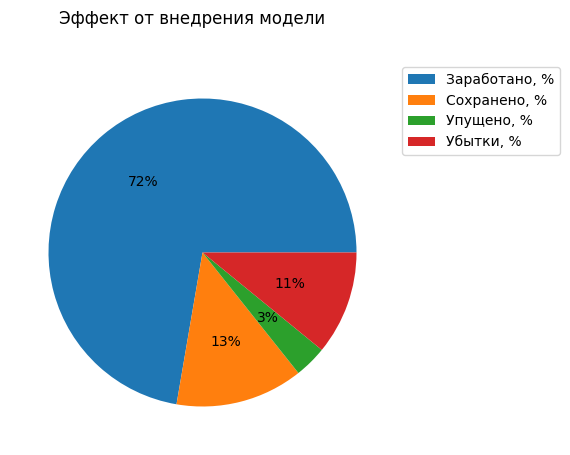

In [ ]:
fig = plt.figure(figsize = (8,5))

fig.suptitle('Эффект от внедрения модели')


ax1 = fig.add_subplot(111)
df_res['Модель с отсечкой 0.5'].plot(kind='pie', autopct='%1.0f%%', labeldistance=None)
ax1.axes.yaxis.set_visible(False)



plt.legend(bbox_to_anchor=(1, 1), loc='upper left');